In [82]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.ensemble import IsolationForest,RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import log_loss,roc_auc_score,f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler


In [84]:
data = pd.read_csv("creditcard.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")


The dataset has 284807 rows and 31 columns.


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [88]:
# Summary Statistics
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

In [90]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [92]:
#distribution of Fraud and Not Fraud
data.Class.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64>

Text(0, 0.5, 'Frequency')

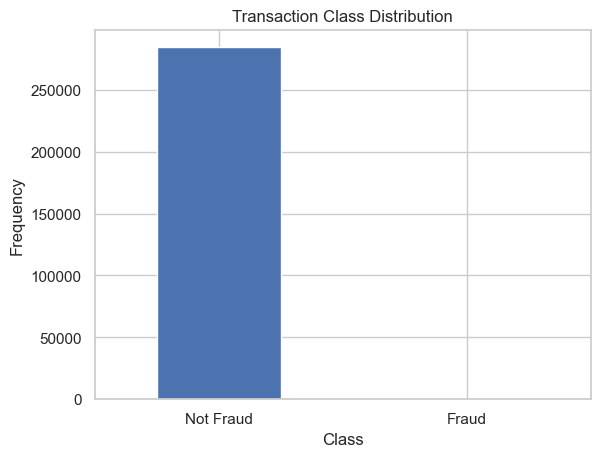

In [94]:
#Visualizing the distribution of "0" and "1" in the dataset
count_classes = data['Class'].value_counts().sort_index()
count_classes.plot(kind = 'bar', rot=0)

# Define LABELS for the x-axis
LABELS = ['Not Fraud', 'Fraud']
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

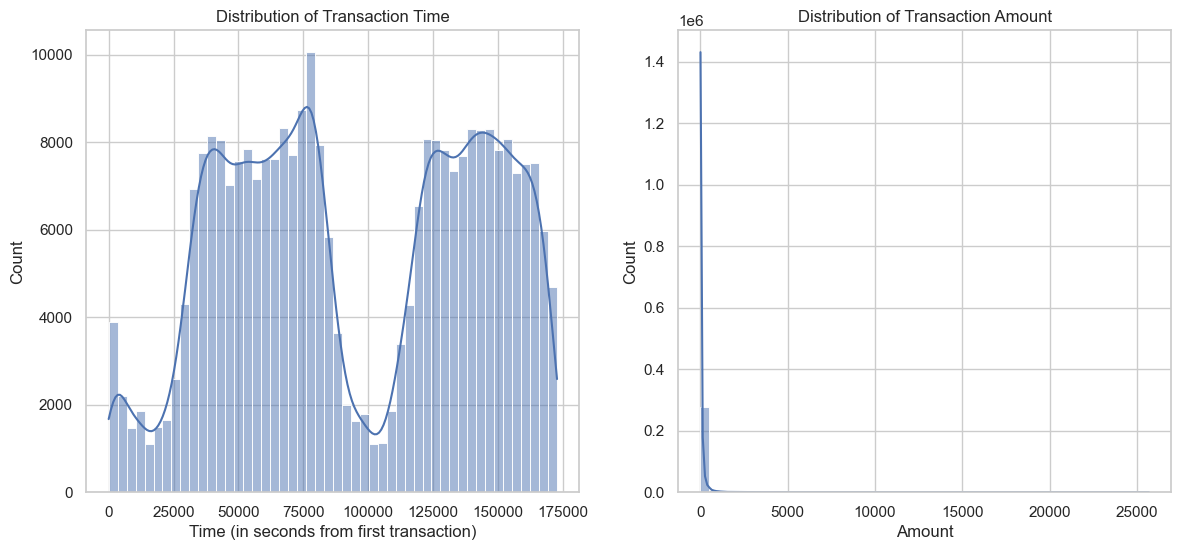

In [96]:
# Visualizing Time and Amount Distribution
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (in seconds from first transaction)')

plt.subplot(1, 2, 2)
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.show()

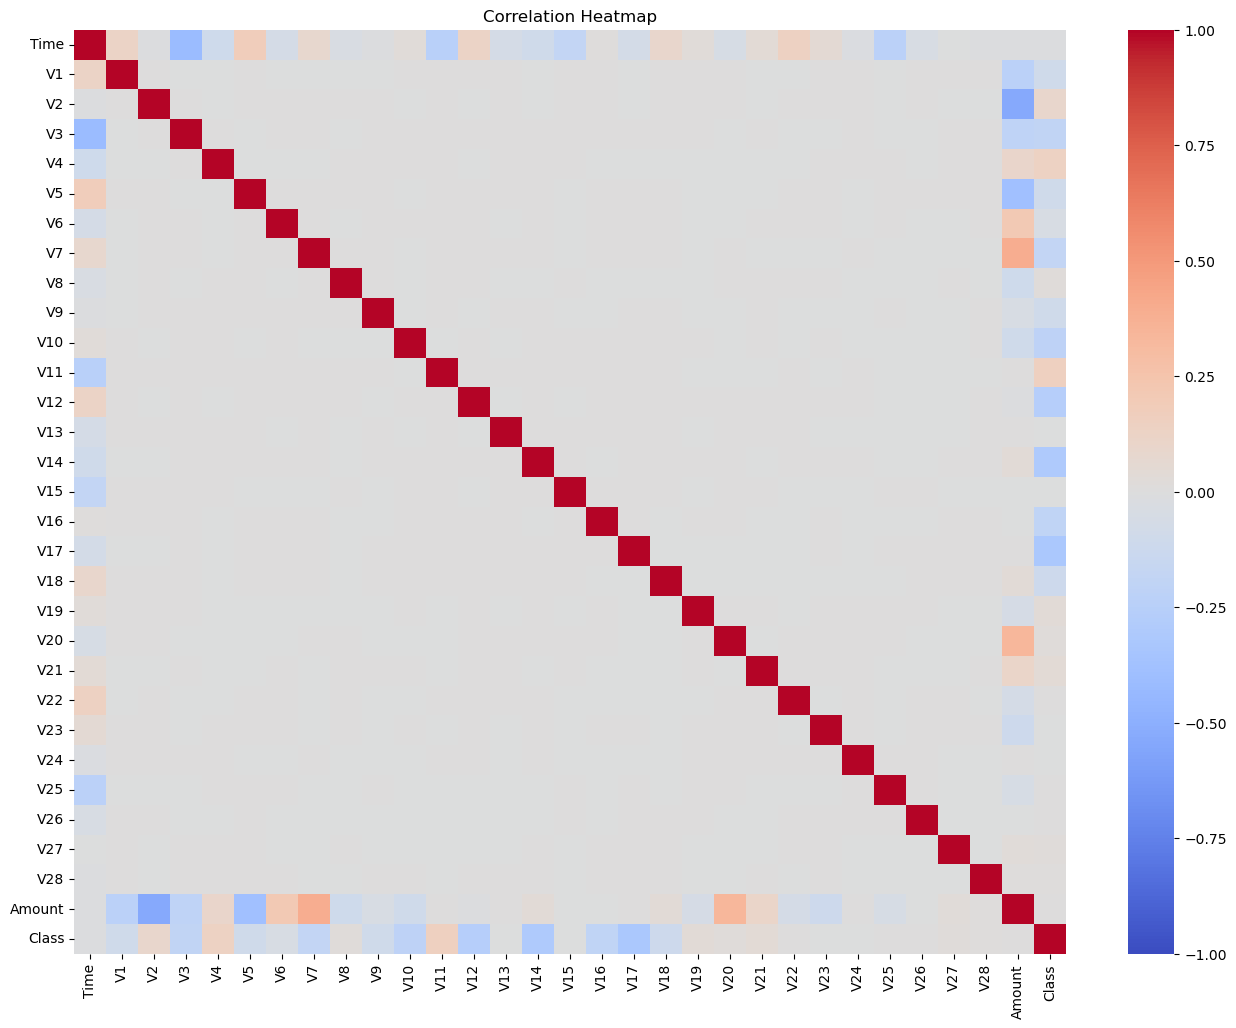

In [10]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [98]:
# Correlation with Target Variable (Class)
corr_target = corr['Class'].sort_values(ascending=False)
print("\nCorrelation of Features with Class:\n", corr_target)

NameError: name 'corr' is not defined

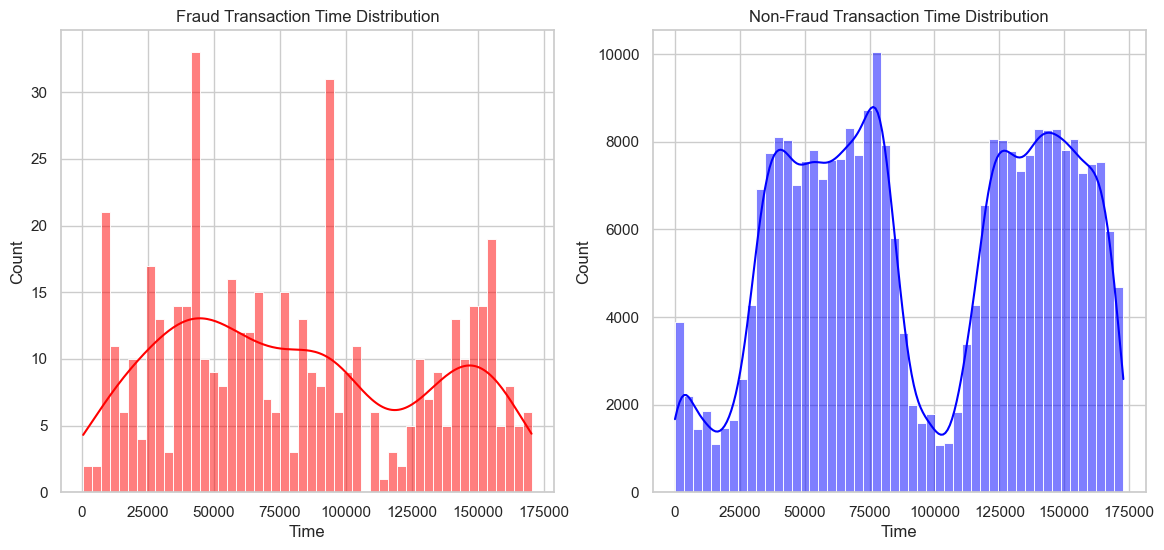

In [100]:
# Distribution Analysis for Fraud and Non-Fraud Transactions
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Time Distribution
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.histplot(fraud['Time'], color='red', bins=50, kde=True)
plt.title('Fraud Transaction Time Distribution')
plt.xlabel('Time')

plt.subplot(1, 2, 2)
sns.histplot(non_fraud['Time'], color='blue', bins=50, kde=True)
plt.title('Non-Fraud Transaction Time Distribution')
plt.xlabel('Time')
plt.show()

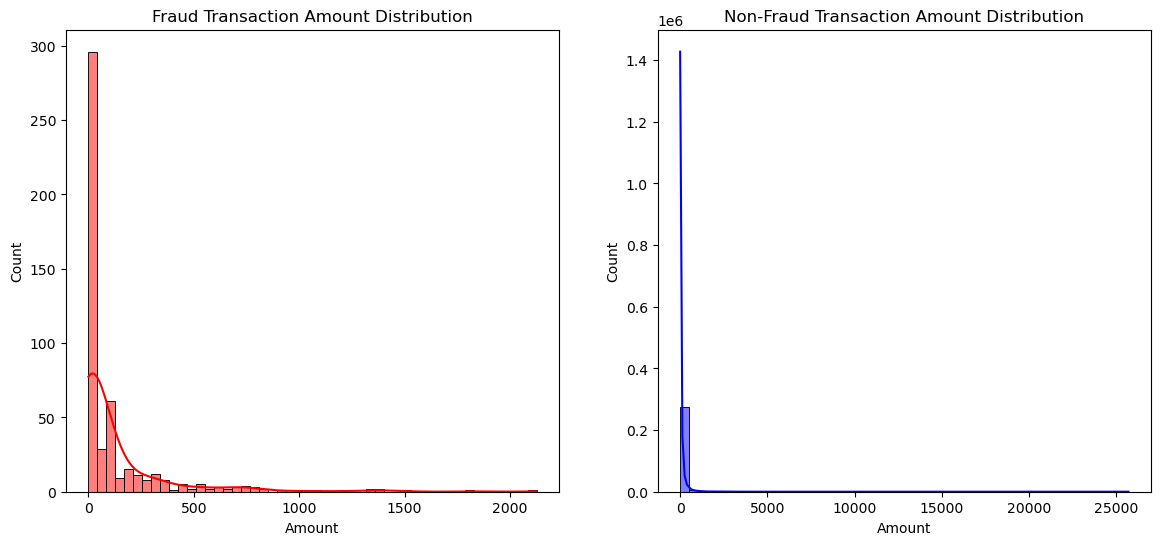

In [24]:
# Amount Distribution
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.histplot(fraud['Amount'], color='red', bins=50, kde=True)
plt.title('Fraud Transaction Amount Distribution')
plt.xlabel('Amount')

plt.subplot(1, 2, 2)
sns.histplot(non_fraud['Amount'], color='blue', bins=50, kde=True)
plt.title('Non-Fraud Transaction Amount Distribution')
plt.xlabel('Amount')
plt.show()

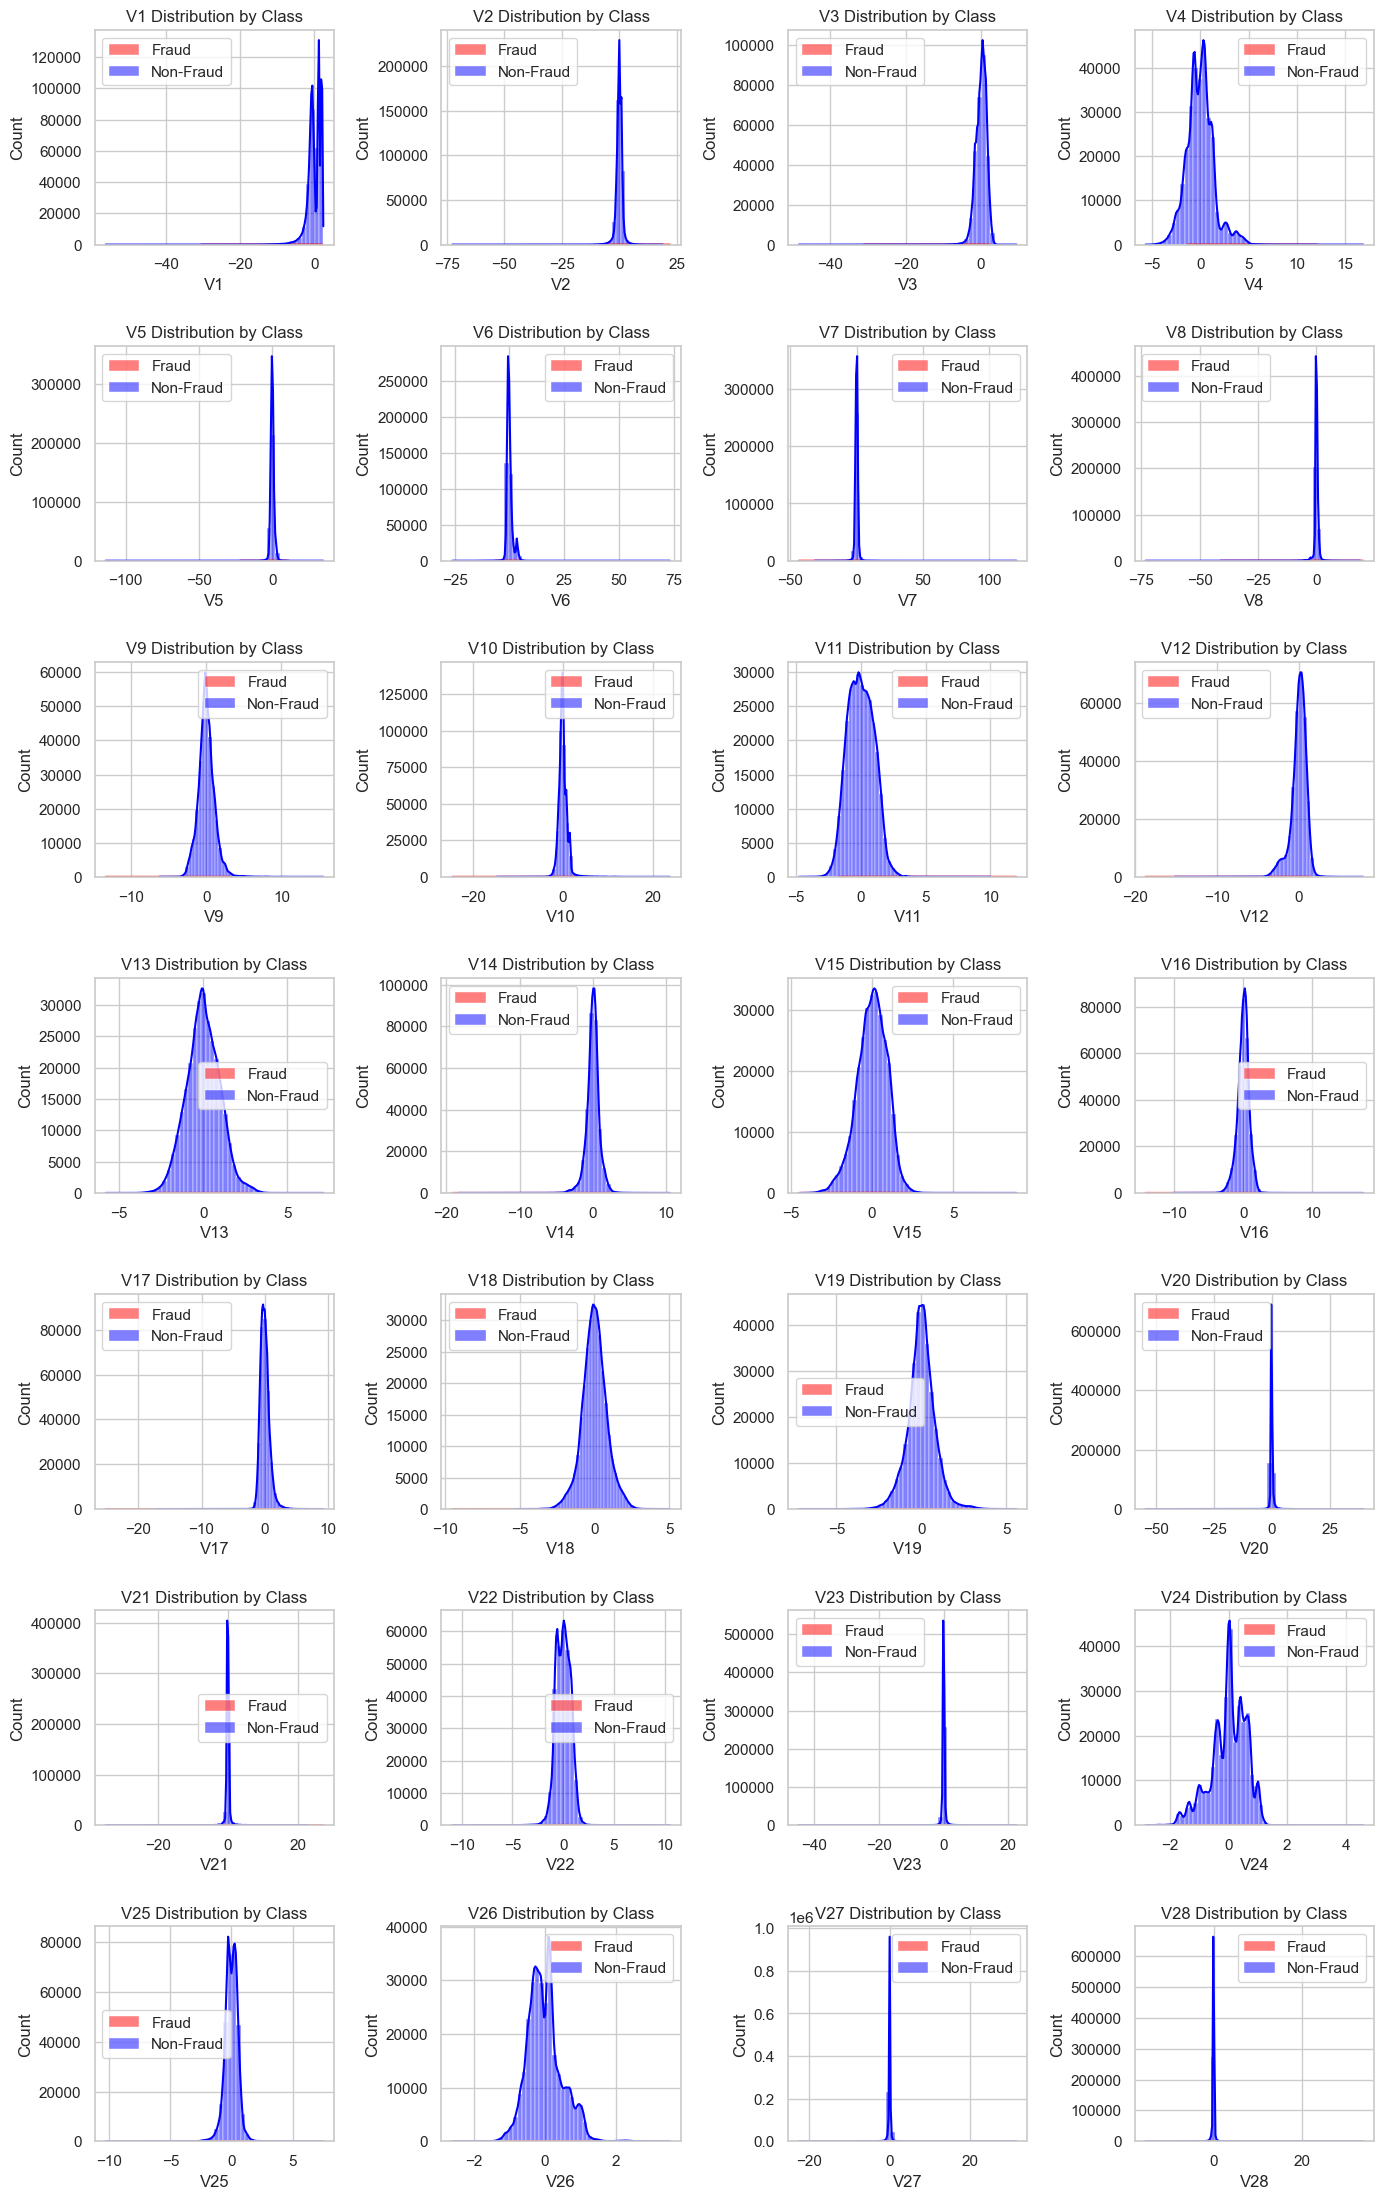

In [101]:
# Feature Distribution for Fraud and Non-Fraud Transactions
plt.figure(figsize=(14, 28))
for i, feature in enumerate(data.columns[1:29]):
    plt.subplot(9, 4, i+1)
    sns.histplot(data[feature][data['Class'] == 1], color='red', bins=50, label='Fraud', kde=True)
    sns.histplot(data[feature][data['Class'] == 0], color='blue', bins=50, label='Non-Fraud', kde=True)
    plt.title(f'{feature} Distribution by Class')
    plt.legend()
plt.tight_layout()
plt.show()

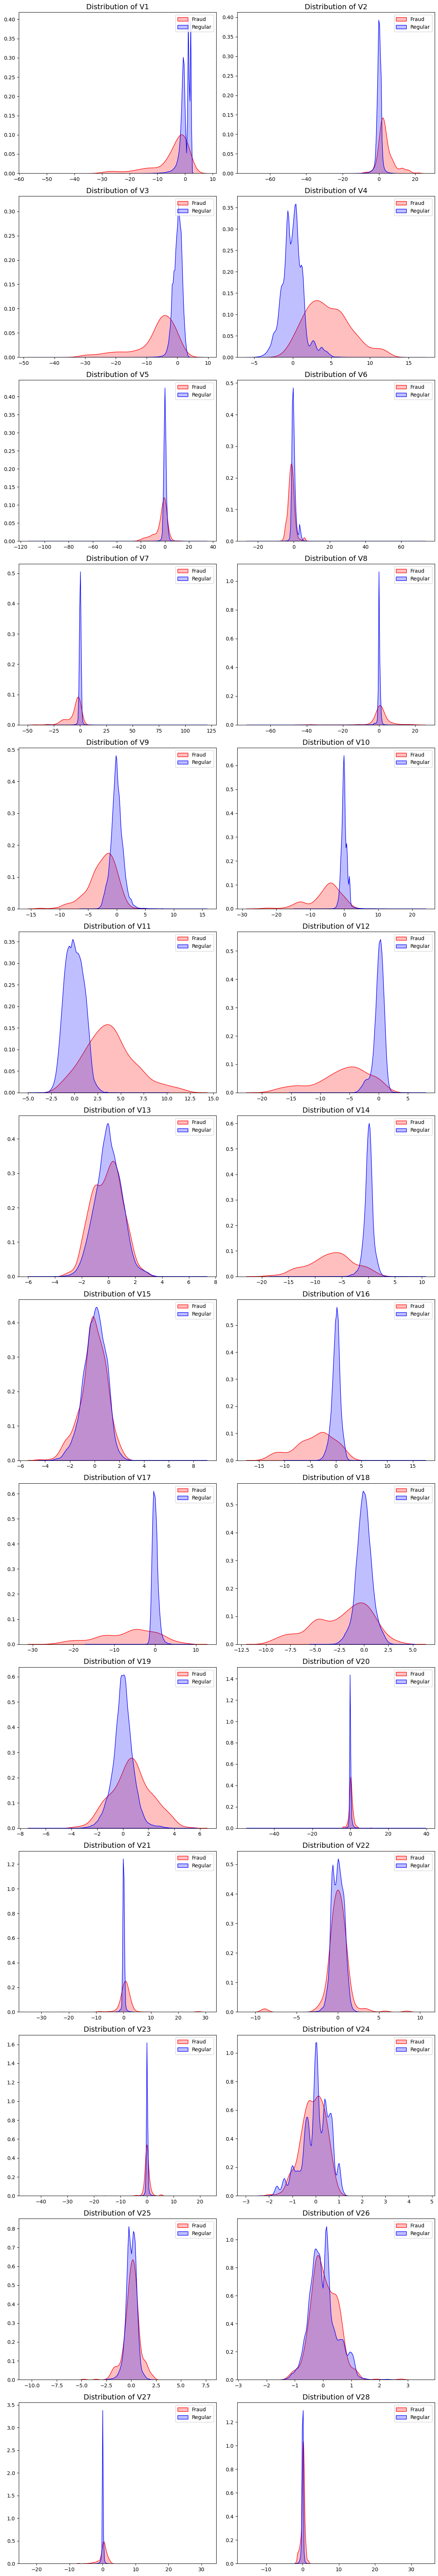

In [26]:
# Set up the plot grid for 28 features (V1 to V28) with 2 columns
num_features = 28
num_cols = 2
num_rows = num_features // num_cols + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))  # Adjust height based on number of rows

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot distributions for each of V1 to V28, separating by fraud and regular transactions
for i in range(1, num_features + 1):
    feature = f'V{i}'
#     This loop iterates over the feature indices from 1 to 28.
# feature = f'V{i}': This creates a string representing the current feature being plotted (e.g., 'V1', 'V2', ..., 'V28').
    # Plot for fraud transactions
    sns.kdeplot(data[data.Class == 1][feature], ax=axes[i - 1], color='red', label='Fraud', fill=True)
    # Plot for regular transactions
    sns.kdeplot(data[data.Class == 0][feature], ax=axes[i - 1], color='blue', label='Regular', fill=True)

    axes[i - 1].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i - 1].set_xlabel('')
    axes[i - 1].set_ylabel('')
    axes[i - 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [19]:
#Overview of the Plots¶
#X-axis: Each feature 𝑉 1 V1 to 𝑉 28 V28 will have its own plot, representing the values of that feature.
#Y-axis: The density of the values, which shows how likely a particular value is to occur.

#Classes:
#Class 0 (Regular Transactions): This will be represented by one color (blue).
#Class 1 (Fraudulent Transactions): This will be represented by another color (red).

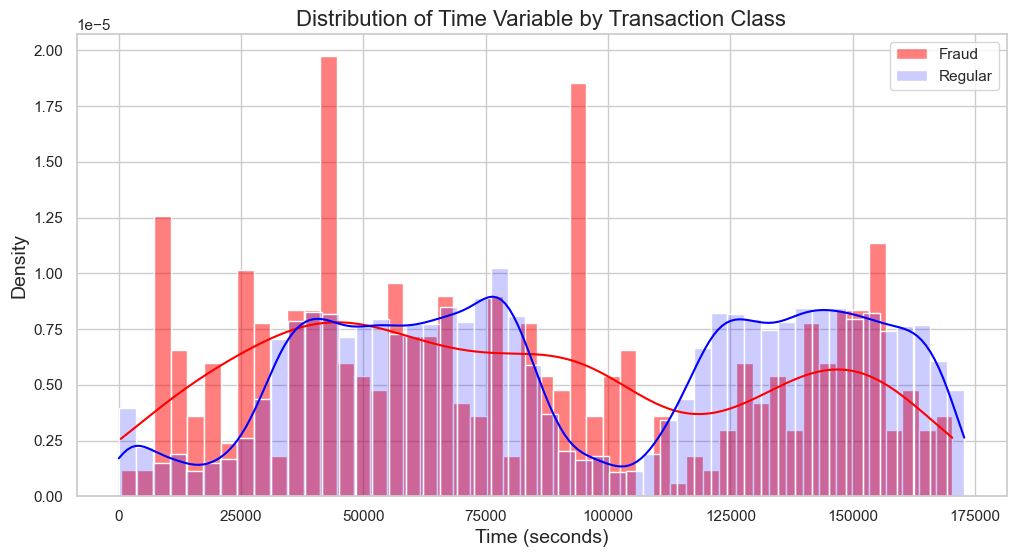

In [103]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure for the distribution plot
plt.figure(figsize=(12, 6))

# Plot the distribution of the 'Time' variable for fraud transactions
sns.histplot(data[data.Class == 1]['Time'], bins=50, kde=True, color='red', stat='density', alpha=0.5, label='Fraud')

# Plot the distribution of the 'Time' variable for regular transactions
sns.histplot(data[data.Class == 0]['Time'], bins=50, kde=True, color='blue', stat='density', alpha=0.2, label='Regular')

# Set title and labels
plt.title('Distribution of Time Variable by Transaction Class', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Show the plot
plt.show()

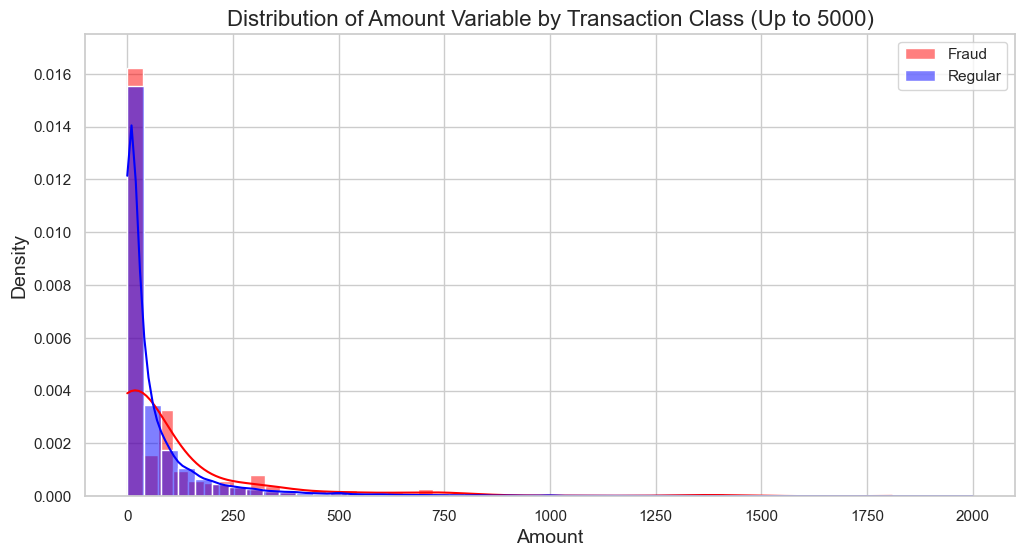

In [106]:
#distribution of time
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure for the distribution plot with increased height
plt.figure(figsize=(12, 6))  # Adjust height as needed

# Filter the data to include only amounts below or equal to 5000
amount_filter = data[data['Amount'] <= 2000]

# Plot the distribution of the 'Amount' variable for fraud transactions
sns.histplot(amount_filter[amount_filter.Class == 1]['Amount'], bins=50, kde=True, color='red', stat='density', alpha=0.5, label='Fraud')

# Plot the distribution of the 'Amount' variable for regular transactions
sns.histplot(amount_filter[amount_filter.Class == 0]['Amount'], bins=50, kde=True, color='blue', stat='density', alpha=0.5, label='Regular')

# Set title and labels
plt.title('Distribution of Amount Variable by Transaction Class (Up to 5000)', fontsize=16)
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Adjust y-axis limits if needed
plt.ylim(0, 0.0175)  # Adjust based on the data

# Add legend
plt.legend()

# Show the plot
plt.show()

In [21]:
#Red (Fraud Transactions): This color is used to show transactions labeled as fraud (where Class == 1). These are important to study in credit card fraud analysis because they show cases of fraud.

#Blue (Regular Transactions): This color represents normal, legitimate transactions (where Class == 0). These make up most of the transactions in the dataset and act as a baseline to compare with the fraudulent ones.

In [26]:
## From the vvisualization we can conclude that

#Class Distribution: There's a significant imbalance, with very few fraud cases (1s) compared to non-fraud cases (0s).
#Amount Distribution: The transaction amounts are highly skewed, with most transactions being relatively small.
#Time Distribution: The time feature, representing seconds elapsed from the first transaction, does not show any significant skew.
#Correlation Matrix: There are weak correlations between the features, which is expected since most features (V1 to V28) are derived from PCA, making them largely independent.

In [108]:
print('There are {} duplicate values in regular transactions out of {}'.format(data[data['Class'] == 0].duplicated().sum(),data[data['Class'] == 0].shape[0]))
print('There are {} duplicate values in fraudulent transactions out of {}'.format(data[data['Class'] == 1].duplicated().sum(),data[data['Class'] == 1].shape[0]))

There are 1062 duplicate values in regular transactions out of 284315
There are 19 duplicate values in fraudulent transactions out of 492


In [110]:
# Dropping Duplicates
print('No. of rows before dropping duplicates: {}.'.format(len(data)))

data.drop_duplicates(inplace=True)

print('No. of rows after dropping duplicates: {}.'.format(len(data)))

No. of rows before dropping duplicates: 284807.
No. of rows after dropping duplicates: 283726.


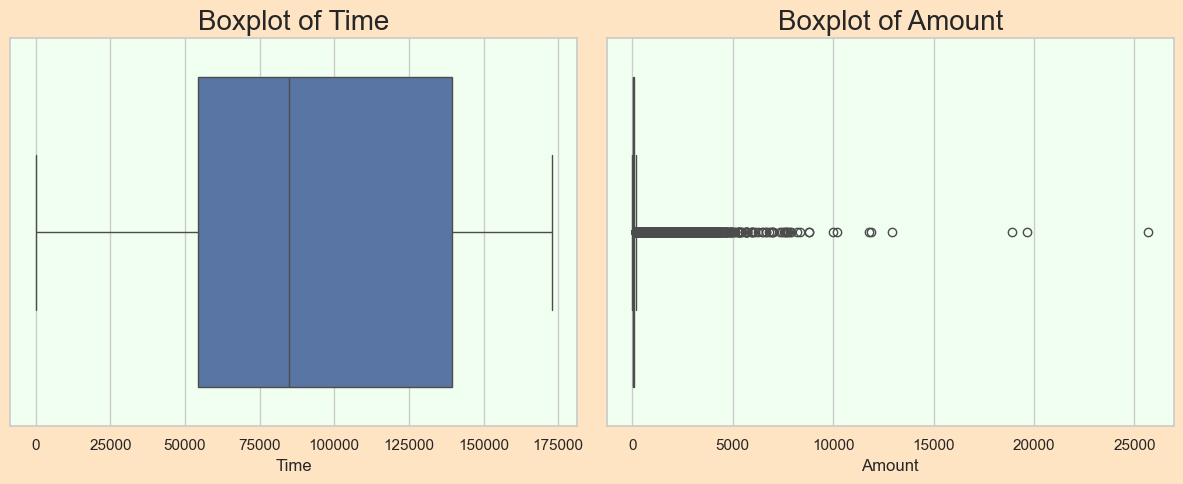

In [112]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Boxplot for Time
sns.boxplot(x=data['Time'], ax=ax1)
ax1.set_title('Boxplot of Time', fontsize=20)
ax1.set_facecolor('honeydew')

# Boxplot for Amount
sns.boxplot(x=data['Amount'], ax=ax2)
ax2.set_title('Boxplot of Amount', fontsize=20)
ax2.set_facecolor('honeydew')

# Adjust layout
plt.tight_layout()

# Set figure background color
fig.set_facecolor('bisque')

# Show plot
plt.show()

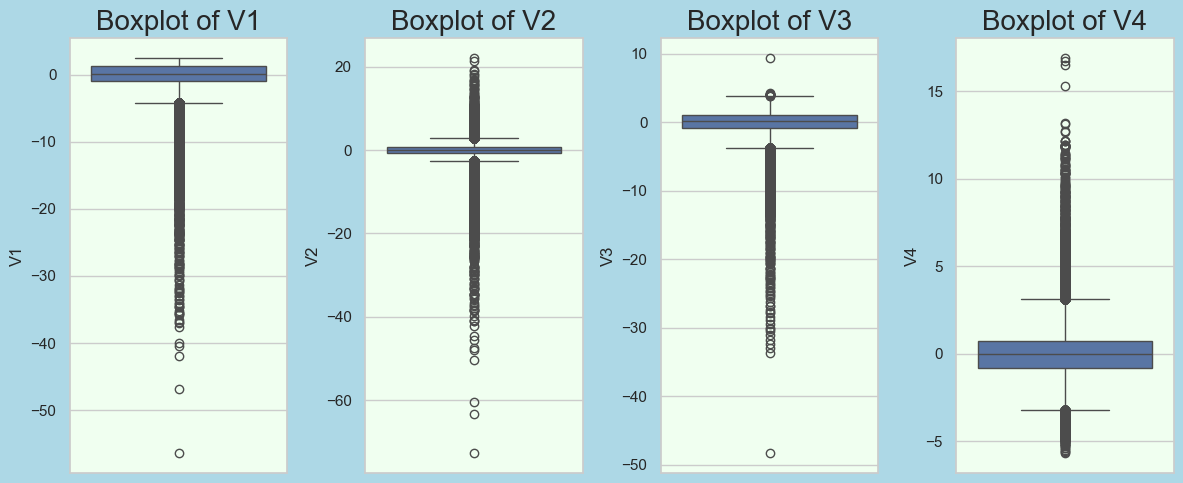

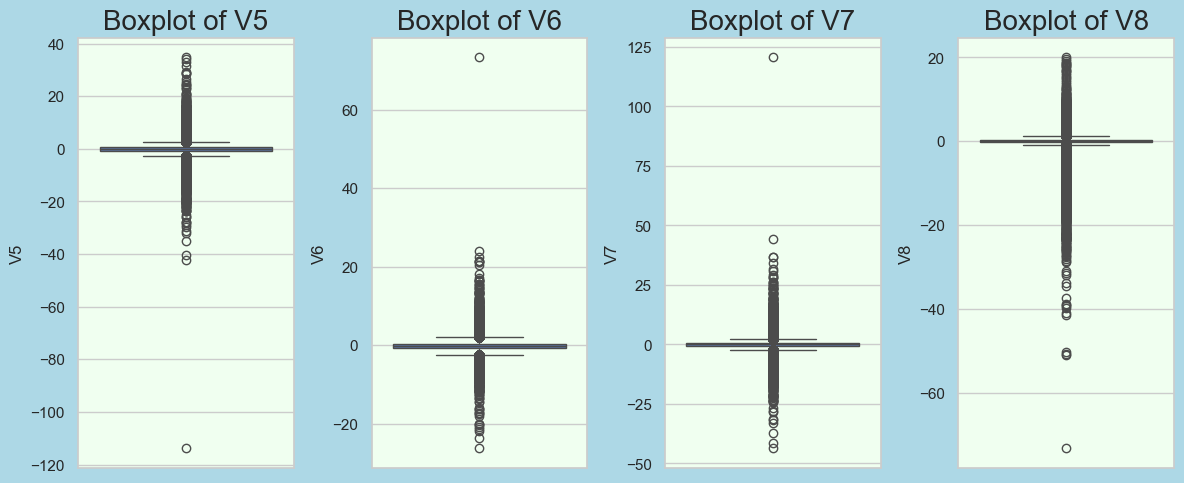

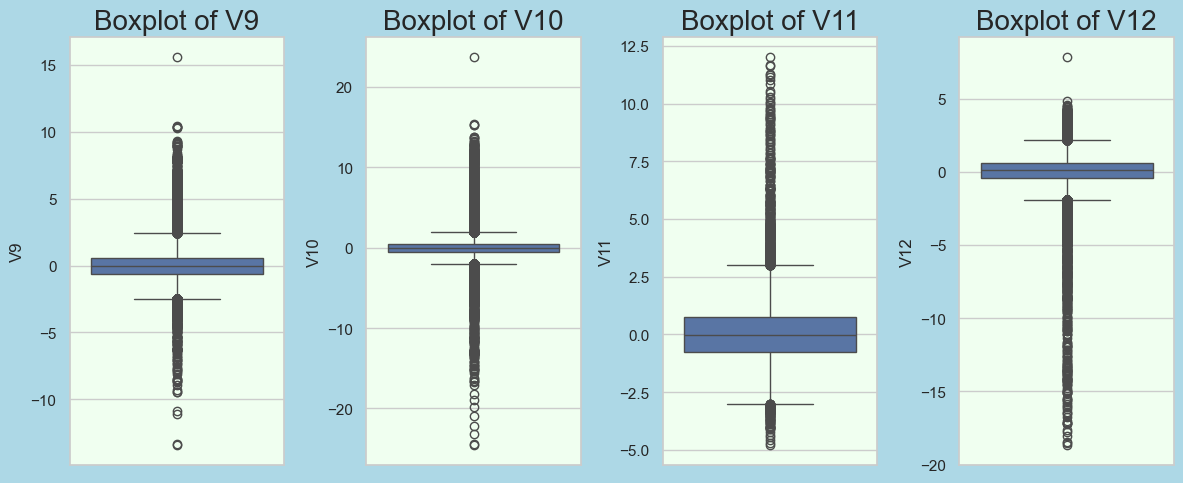

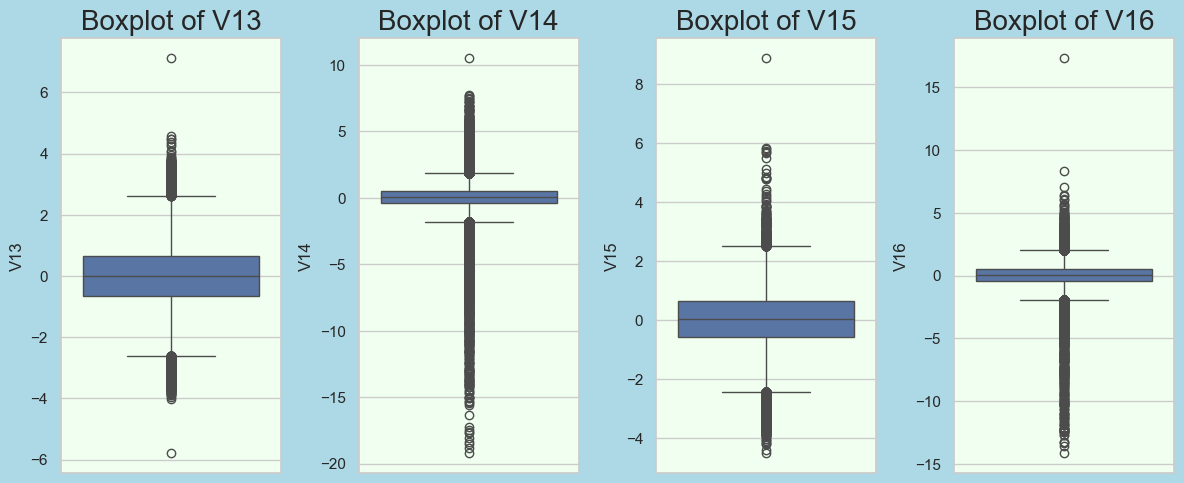

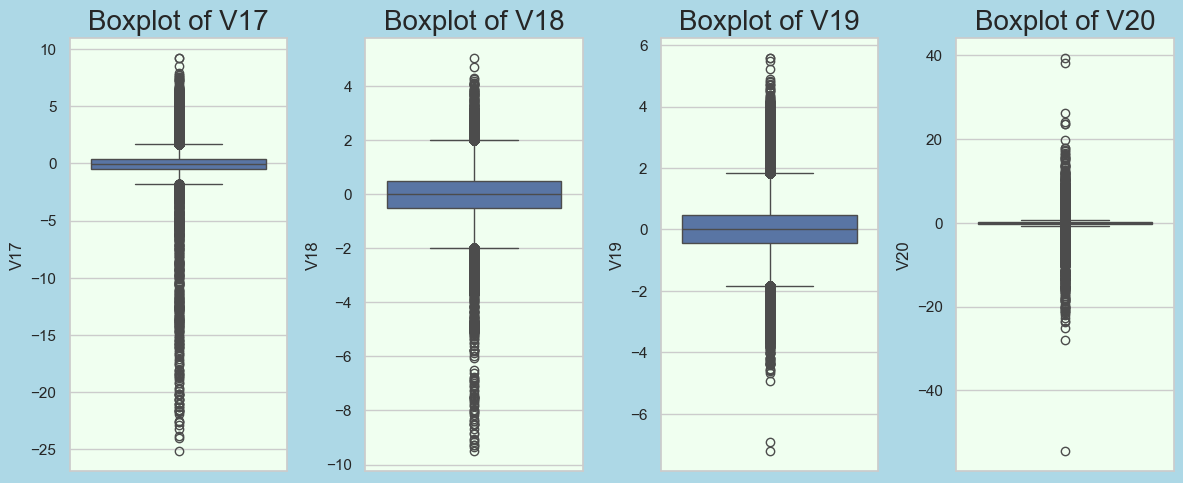

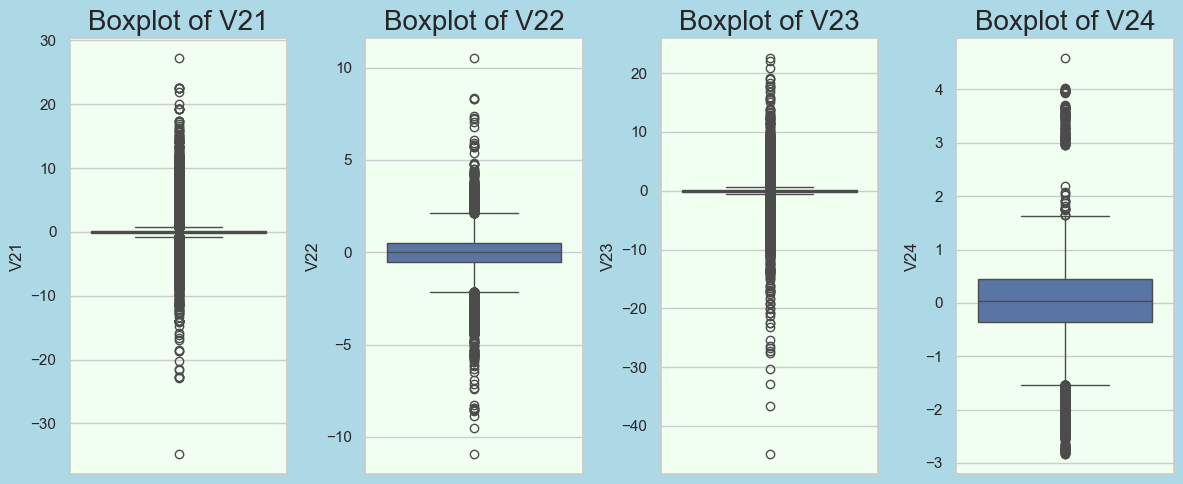

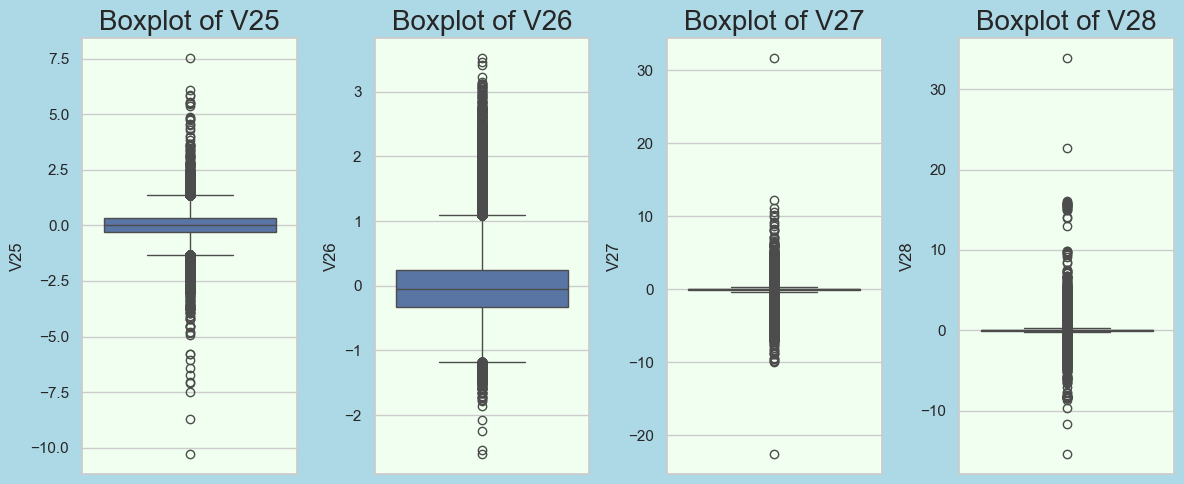

In [114]:
# Select only the V1-V28 features
features = list(data.columns.values)
del features[0]
del features[28]
del features[28]

for i in range(7):#i 0 to 6
  fig,(ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(12,5))#wide=12,tall=5
  #plot diagram by 4 rows
  ax1=sns.boxplot(data[features[i*4]],ax=ax1)
  ax1.set_title('Boxplot of '+str(features[i*4]),fontsize=20)
  ax1.set_facecolor('honeydew')

  ax2=sns.boxplot(data[features[i*4+1]],ax=ax2)
  ax2.set_title('Boxplot of '+str(features[i*4+1]),fontsize=20)
  ax2.set_facecolor('honeydew')

  ax3=sns.boxplot(data[features[i*4+2]],ax=ax3)
  ax3.set_title('Boxplot of '+str(features[i*4+2]),fontsize=20)
  ax3.set_facecolor('honeydew')

  ax4=sns.boxplot(data[features[i*4+3]],ax=ax4)
  ax4.set_title('Boxplot of '+str(features[i*4+3]),fontsize=20)
  ax4.set_facecolor('honeydew')

  plt.tight_layout()
  fig.set_facecolor('#ADD8E6')


In [41]:
for column in features:
  #check how much skew
  print(f"Skewness for {column}: {data[column].skew()}")

Skewness for V1: -3.273271248440309
Skewness for V2: -4.6951619005404694
Skewness for V3: -2.151983957099713
Skewness for V4: 0.6715041706728241
Skewness for V5: -2.414079246966253
Skewness for V6: 1.829880383771521
Skewness for V7: 2.890271192715498
Skewness for V8: -8.310970330052545
Skewness for V9: 0.5376630534496958
Skewness for V10: 1.2529670787468168
Skewness for V11: 0.34407419325686267
Skewness for V12: -2.1990082816149954
Skewness for V13: 0.06429340464018111
Skewness for V14: -1.9188037137586451
Skewness for V15: -0.3096590822936595
Skewness for V16: -1.0511614715174662
Skewness for V17: -3.690497194148406
Skewness for V18: -0.24866145737243997
Skewness for V19: 0.1083118109324772
Skewness for V20: -2.0431210560273323
Skewness for V21: 2.820033113572543
Skewness for V22: -0.18232972797521269
Skewness for V23: -5.867220791006341
Skewness for V24: -0.5521292366718961
Skewness for V25: -0.41574386205469593
Skewness for V26: 0.5802923172348093
Skewness for V27: -0.75380391381865

In [118]:

# Step 1: Log Transformation for Skewed Features

# Copy original data to a transformed dataset
data_transformed = data.copy()

# Function to apply log transformation with handling for invalid values
def log_transform_skewed(column):
    # Apply log transformation only for values greater than zero, else keep original value
    transformed = np.where(column > 0, np.log1p(column),
                           np.where(column < 0, -np.log1p(-column), 0))
    return transformed


# Identify features with high skewness
features = data.drop(columns=['Class', 'Amount', 'Time']).columns  # Exclude target and original 'Amount' and 'Time'
for col in features:
    if abs(data[col].skew()) > 0.75:  # Apply log transformation for skewness above threshold
        data_transformed[col] = log_transform_skewed(data[col])

# Step 2: Outlier Capping using IQR method

# Define the outlier imputation function using IQR
def outlier_imputer(data, features):
    data_out = data.copy()
    for column in features:
        Q1 = data_out[column].quantile(0.25)
        Q3 = data_out[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        # Capping outliers
        data_out.loc[data_out[column] < lower_limit, column] = lower_limit
        data_out.loc[data_out[column] > upper_limit, column] = upper_limit
    return data_out

# Apply outlier capping to the transformed data
data_transformed = outlier_imputer(data_transformed, features)


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [120]:
# Compare skewness before and after transformation
skewness_before = data[features].skew()
skewness_after = data_transformed[features].skew()

# Display skewness comparison after transformations
skewness_comparison = pd.DataFrame({
    'Skewness Before': skewness_before,
    'Skewness After': skewness_after
})

# Display the DataFrame in Jupyter Notebook
skewness_comparison

Skewness Before  Skewness After
V1         -3.273271       -0.354934
V2         -4.695162       -0.221635
V3         -2.151984       -0.305265
V4          0.671504        0.184787
V5         -2.414079        0.155333
V6          1.829880        0.794258
V7          2.890271       -0.086011
V8         -8.310970       -0.001193
V9          0.537663        0.099859
V10         1.252967        0.324482
V11         0.344074        0.104856
V12        -2.199008       -0.572194
V13         0.064293        0.039082
V14        -1.918804       -0.197342
V15        -0.309659       -0.262597
V16        -1.051161       -0.234258
V17        -3.690497        0.381437
V18        -0.248661        0.011311
V19         0.108312       -0.036423
V20        -2.043121        0.358228
V21         2.820033        0.136519
V22        -0.182330       -0.035928
V23        -5.867221        0.091884
V24        -0.552129       -0.543730
V25        -0.415744       -0.156094
V26         0.580292        0.367262
V27        -0.753804        0.064610
V28        11.555115       -0.070118

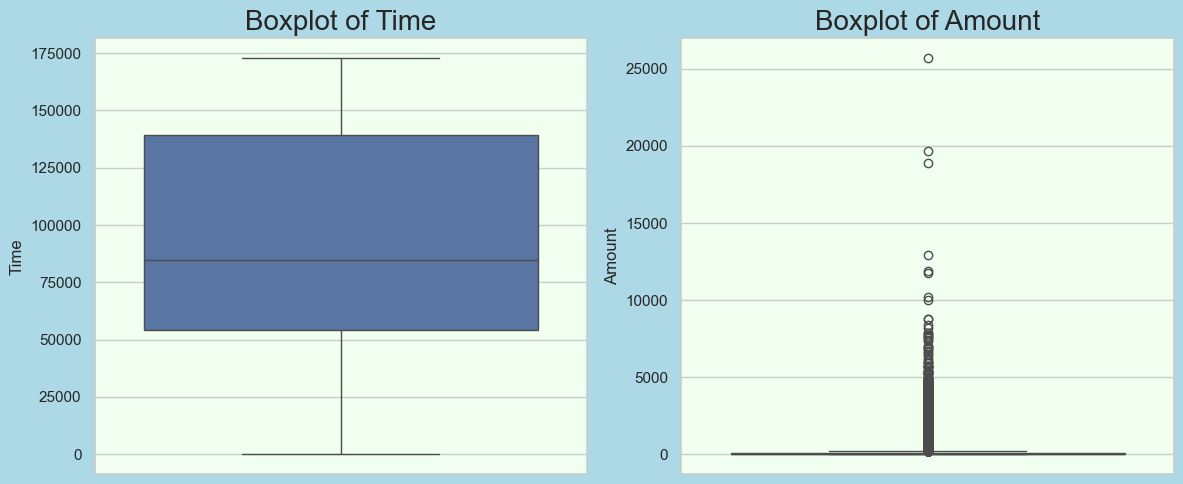

In [122]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1 = sns.boxplot(data_transformed['Time'],ax=ax1)
ax1.set_title('Boxplot of Time',fontsize=20)
ax1.set_facecolor('honeydew')
ax2 = sns.boxplot(data_transformed['Amount'],ax=ax2)
ax2.set_title('Boxplot of Amount',fontsize=20)
ax2.set_facecolor('honeydew')


plt.tight_layout()
fig.set_facecolor('#ADD8E6')

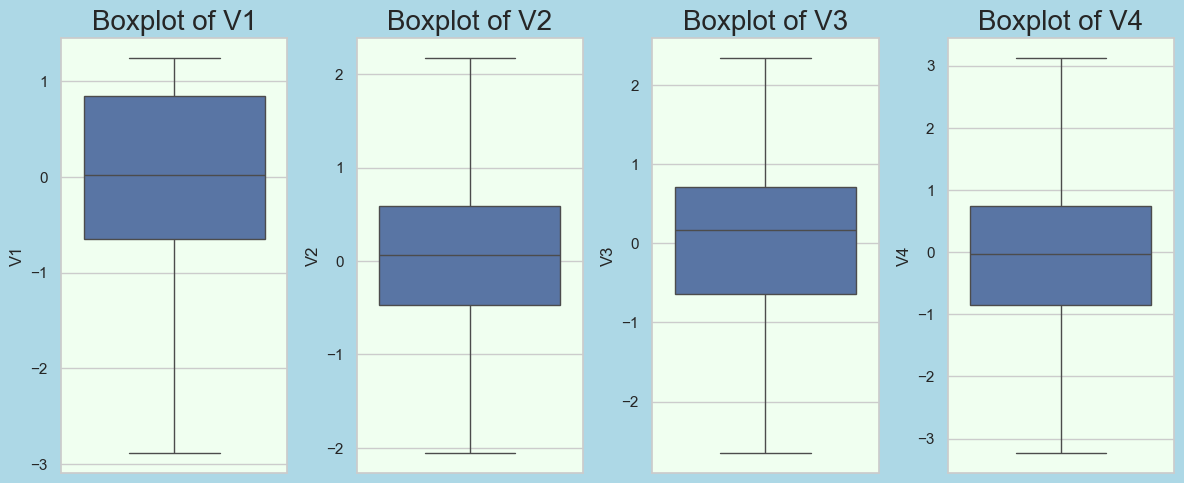

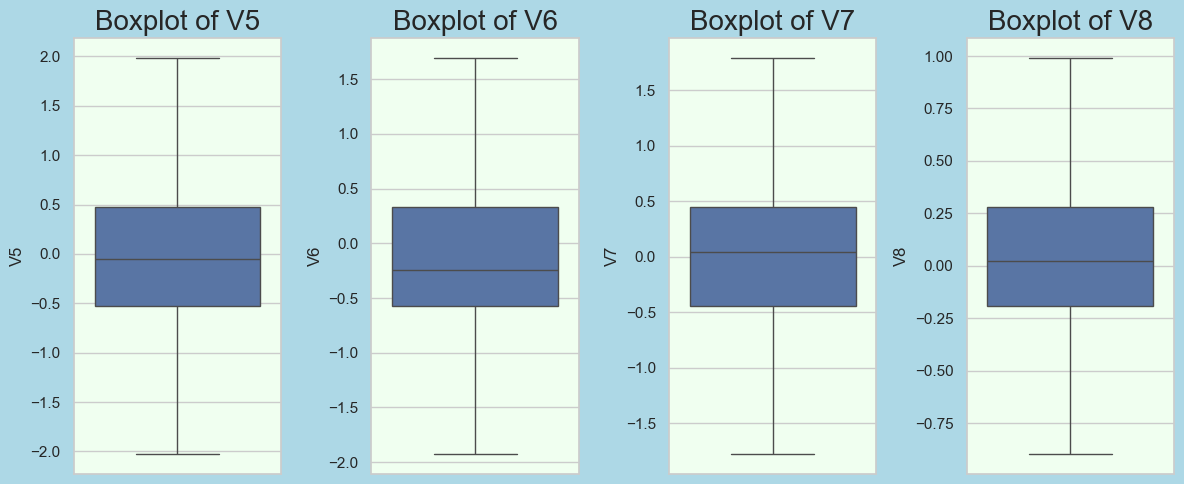

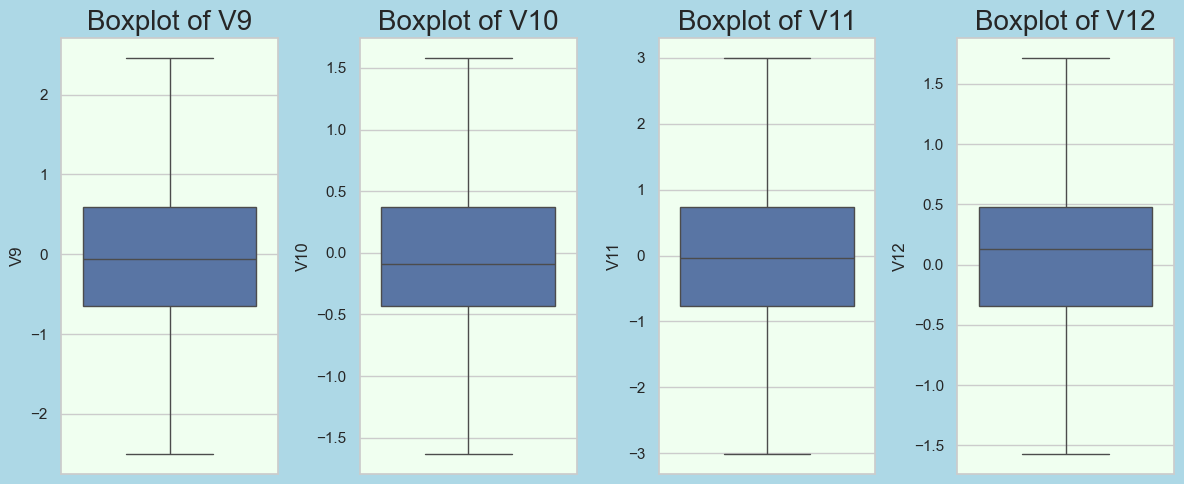

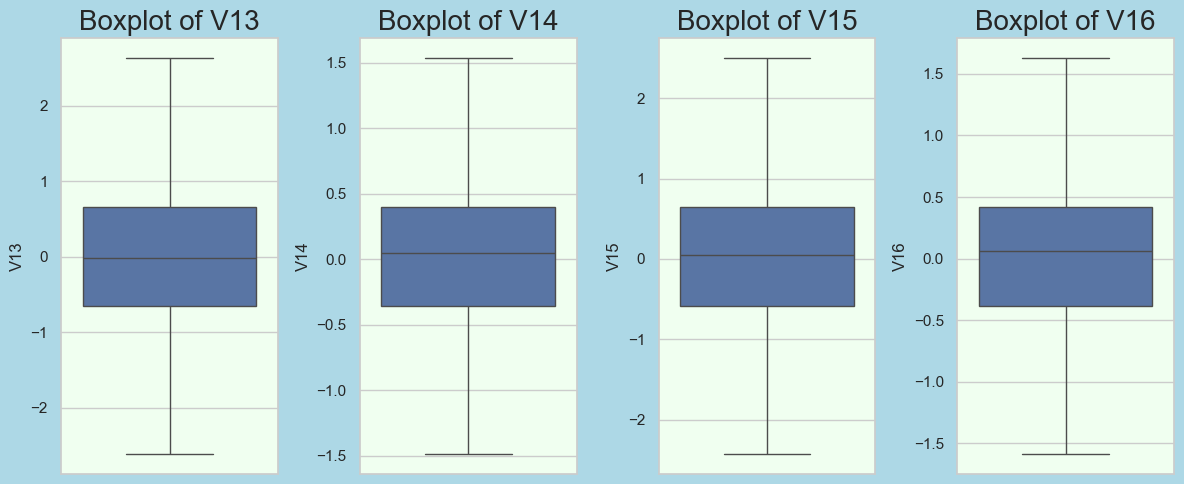

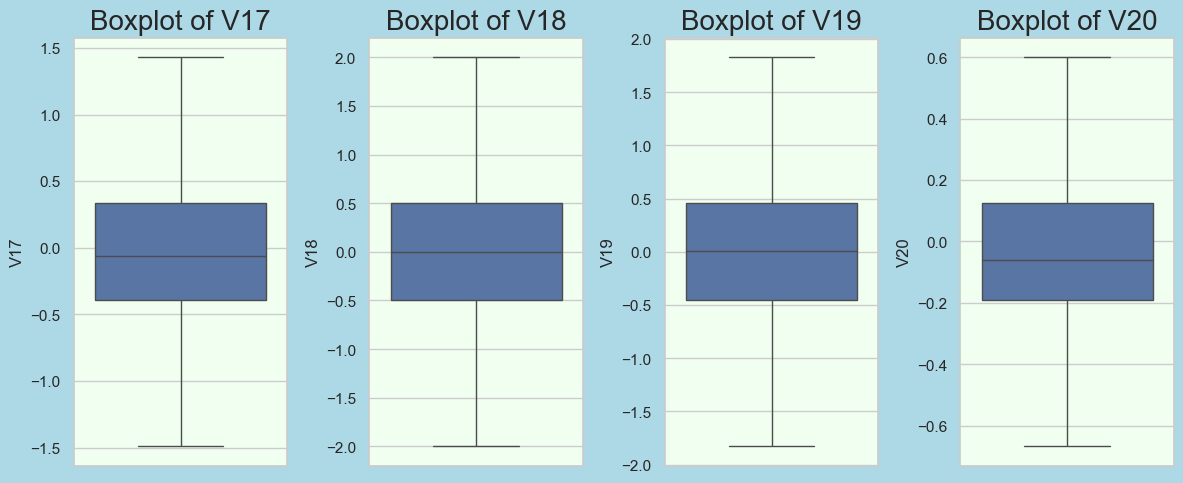

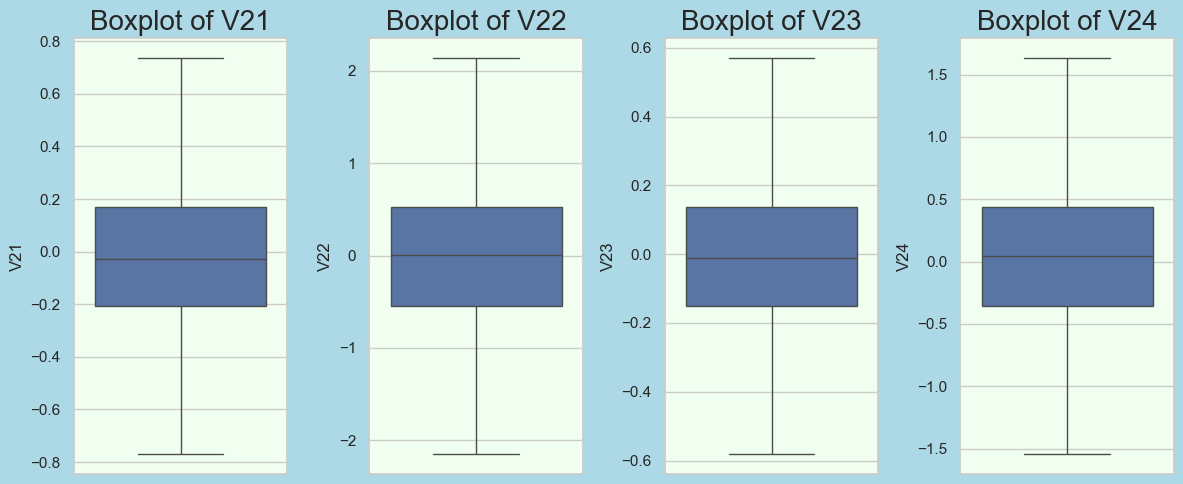

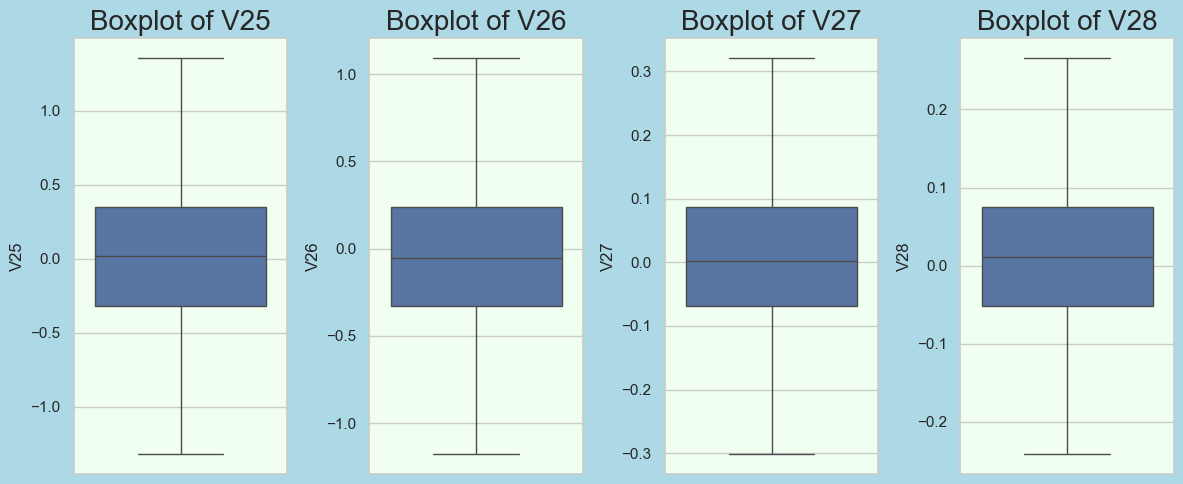

In [124]:
# Select only the V1-V28 features
features = list(data_transformed.columns.values)
del features[0]  # Remove 'Time' or other initial columns if necessary
del features[28]  # Adjust indexing to remove unwanted columns
del features[28]  # Repeat as needed to only have V1-V28 features

for i in range(7):  # Loop for 7 groups of 4 features each
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12, 5))  # Create 4 subplots per row

    # Plot boxplots for 4 features in each row
    ax1 = sns.boxplot(data_transformed[features[i * 4]], ax=ax1)
    ax1.set_title('Boxplot of ' + str(features[i * 4]), fontsize=20)
    ax1.set_facecolor('honeydew')

    ax2 = sns.boxplot(data_transformed[features[i * 4 + 1]], ax=ax2)
    ax2.set_title('Boxplot of ' + str(features[i * 4 + 1]), fontsize=20)
    ax2.set_facecolor('honeydew')

    ax3 = sns.boxplot(data_transformed[features[i * 4 + 2]], ax=ax3)
    ax3.set_title('Boxplot of ' + str(features[i * 4 + 2]), fontsize=20)
    ax3.set_facecolor('honeydew')

    ax4 = sns.boxplot(data_transformed[features[i * 4 + 3]], ax=ax4)
    ax4.set_title('Boxplot of ' + str(features[i * 4 + 3]), fontsize=20)
    ax4.set_facecolor('honeydew')

    plt.tight_layout()
    fig.set_facecolor('#ADD8E6')


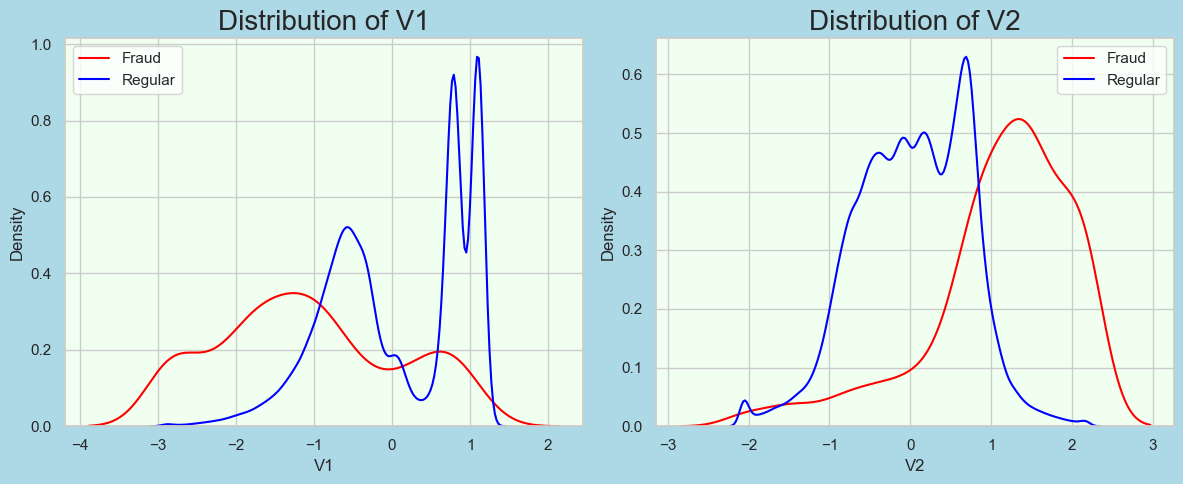

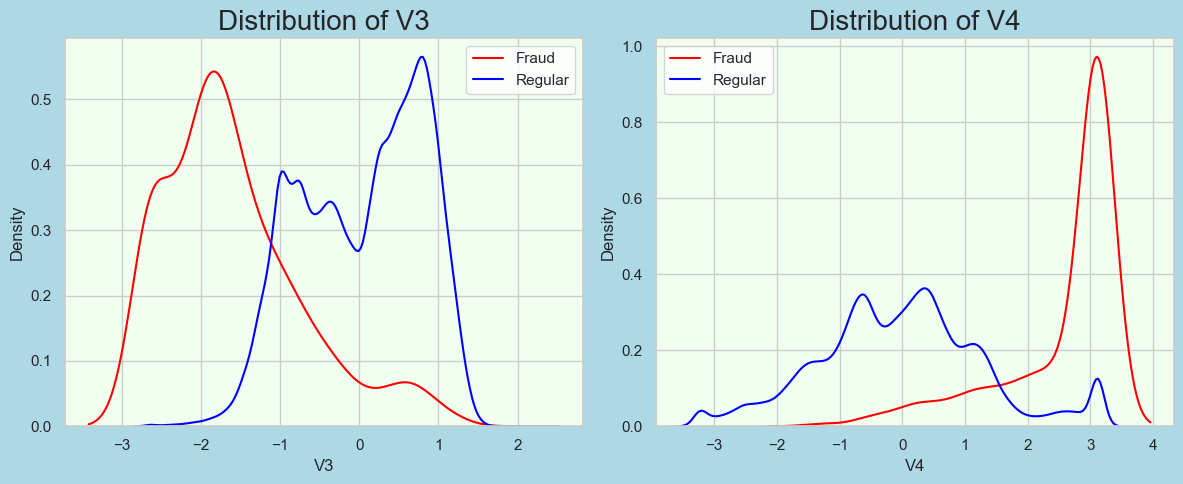

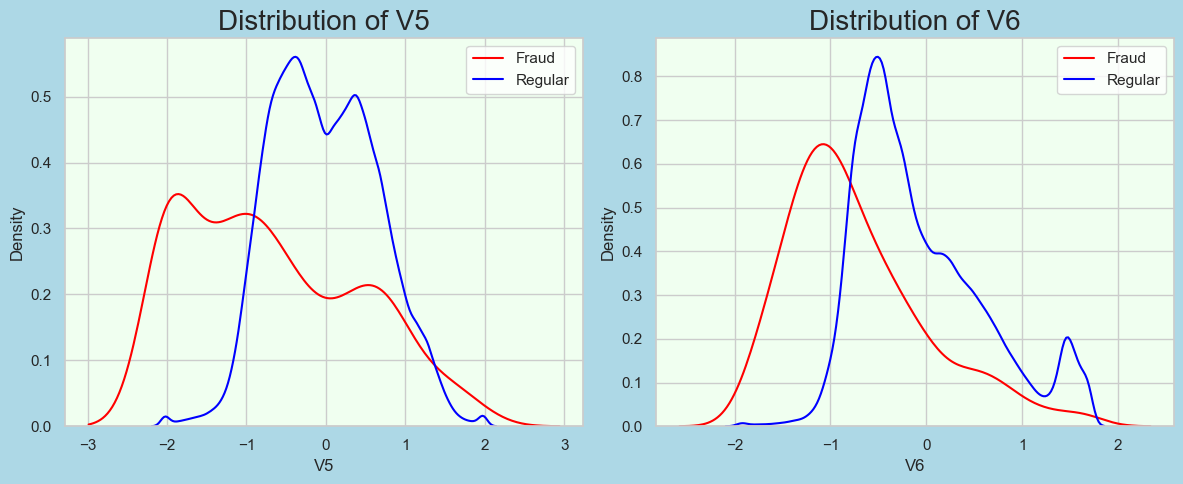

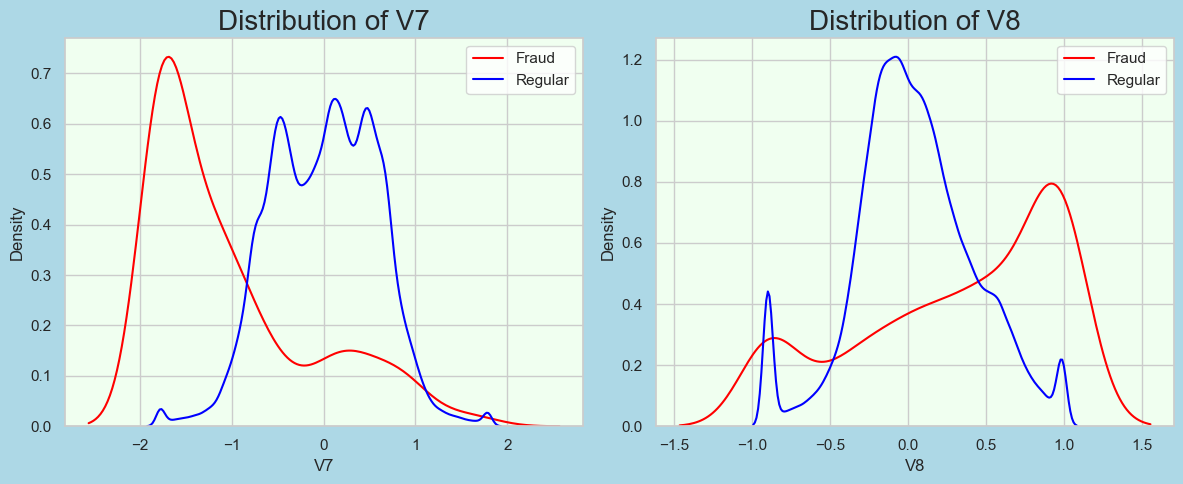

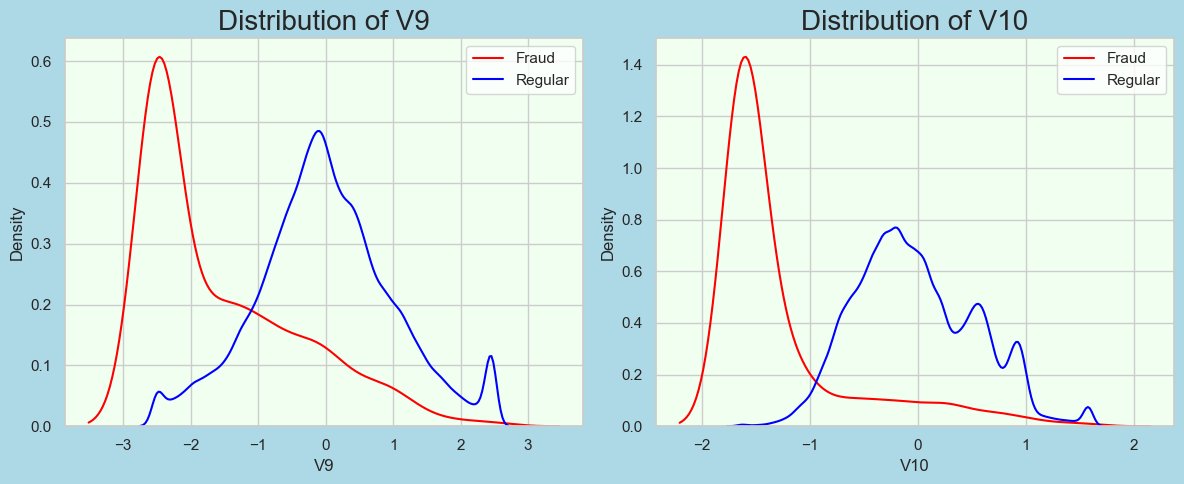

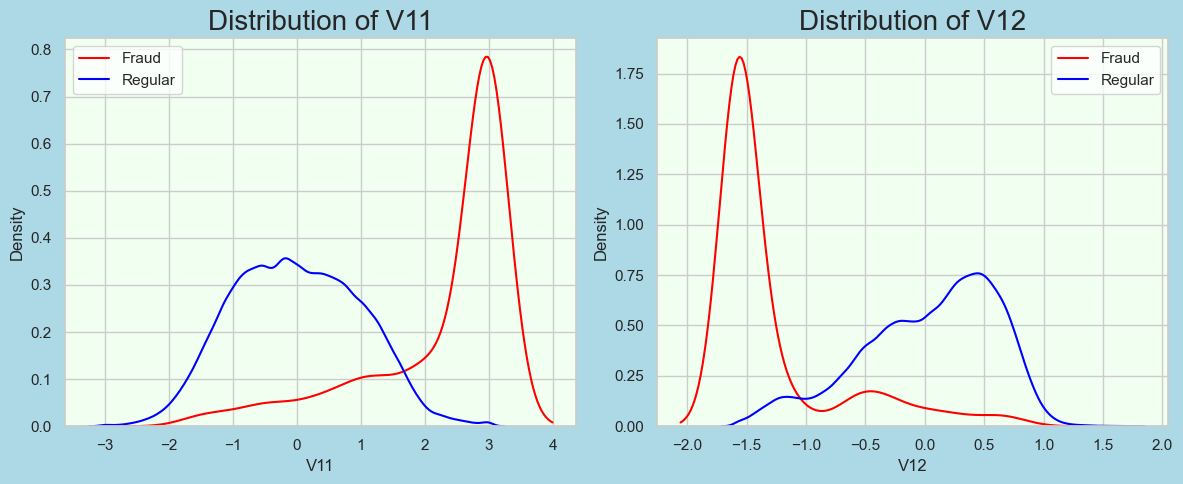

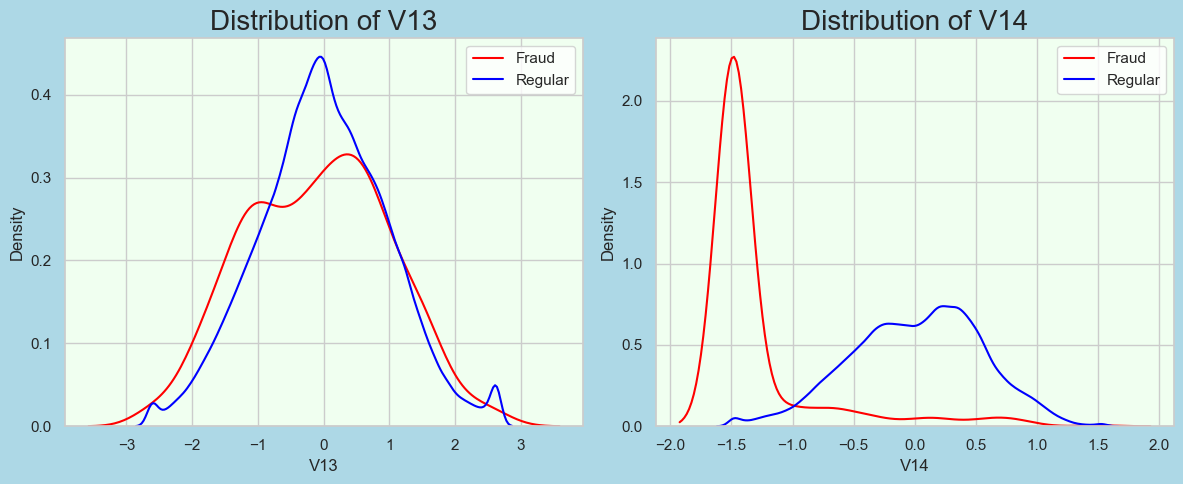

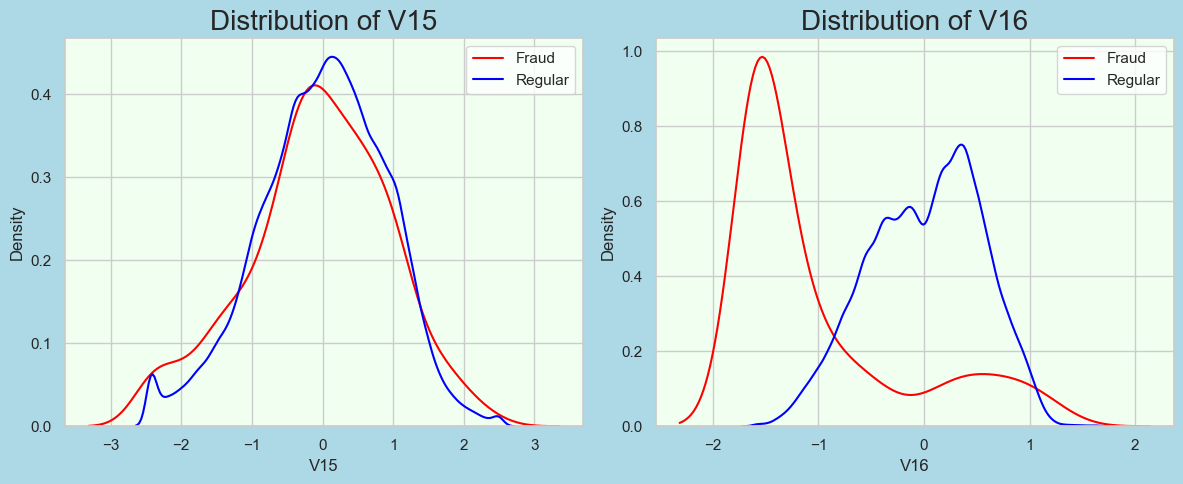

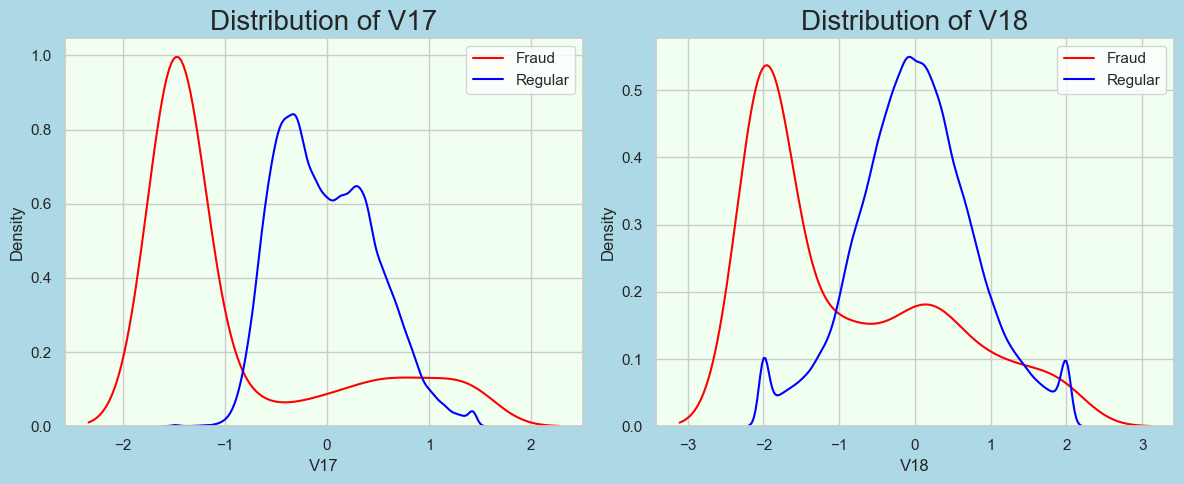

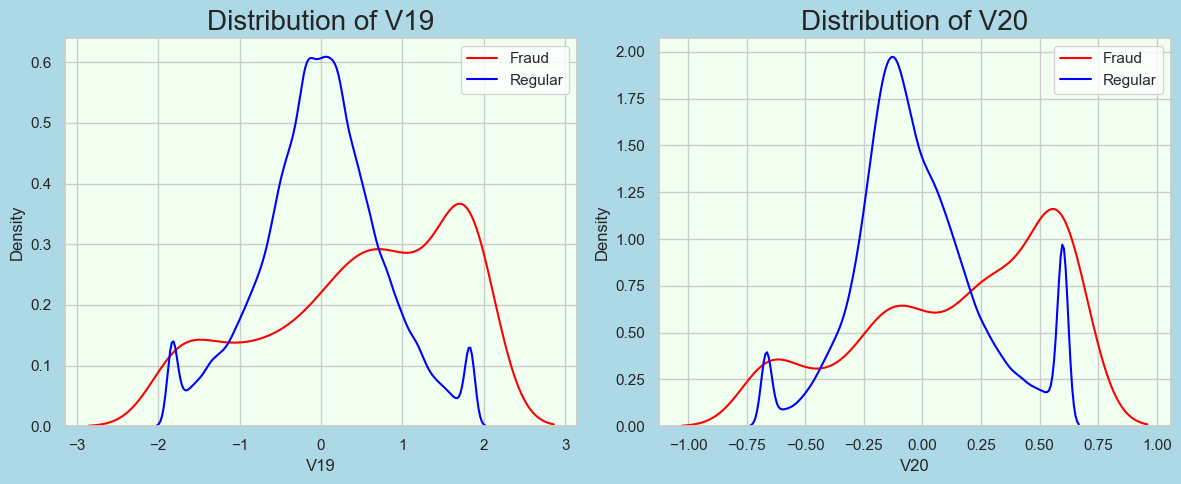

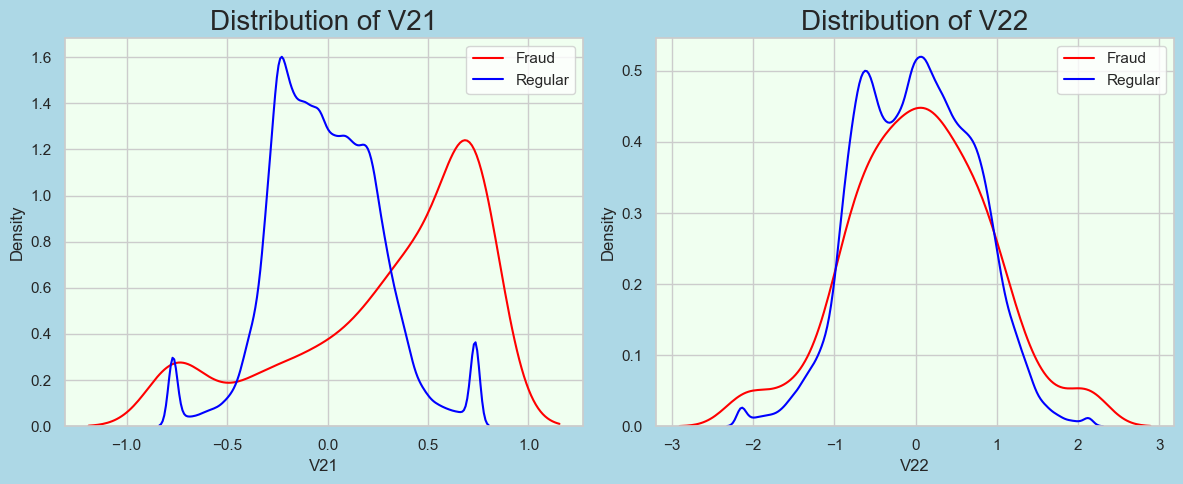

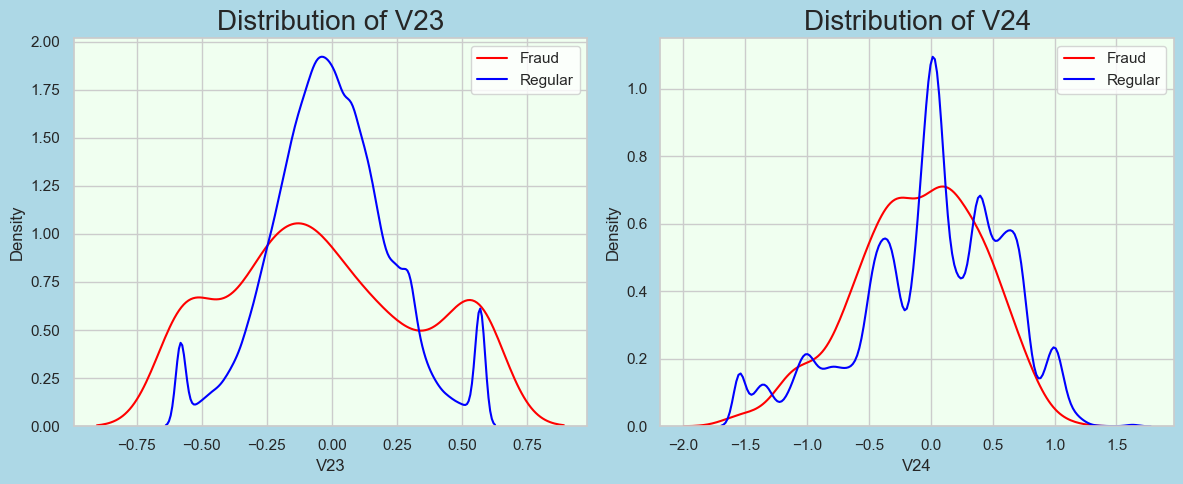

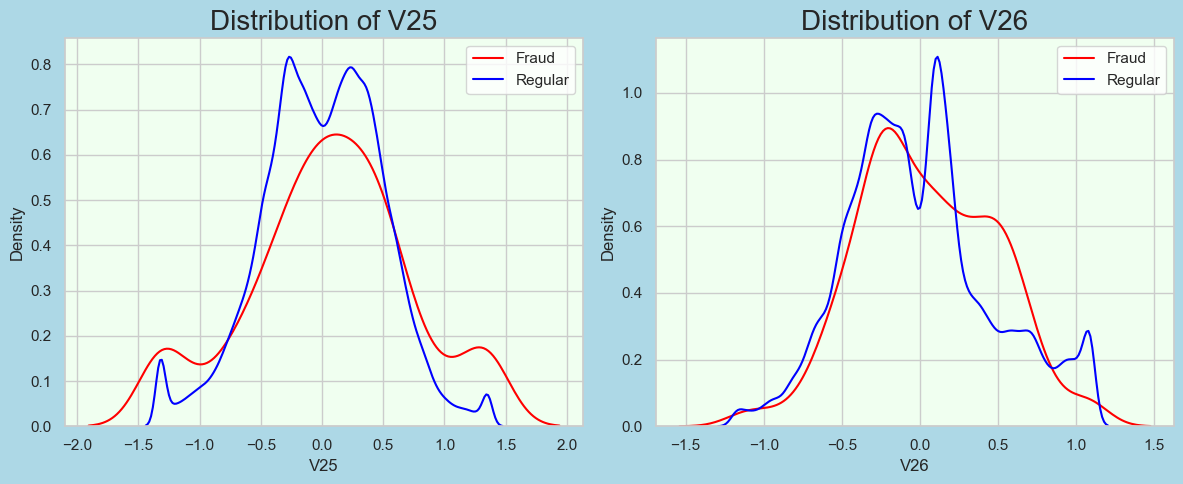

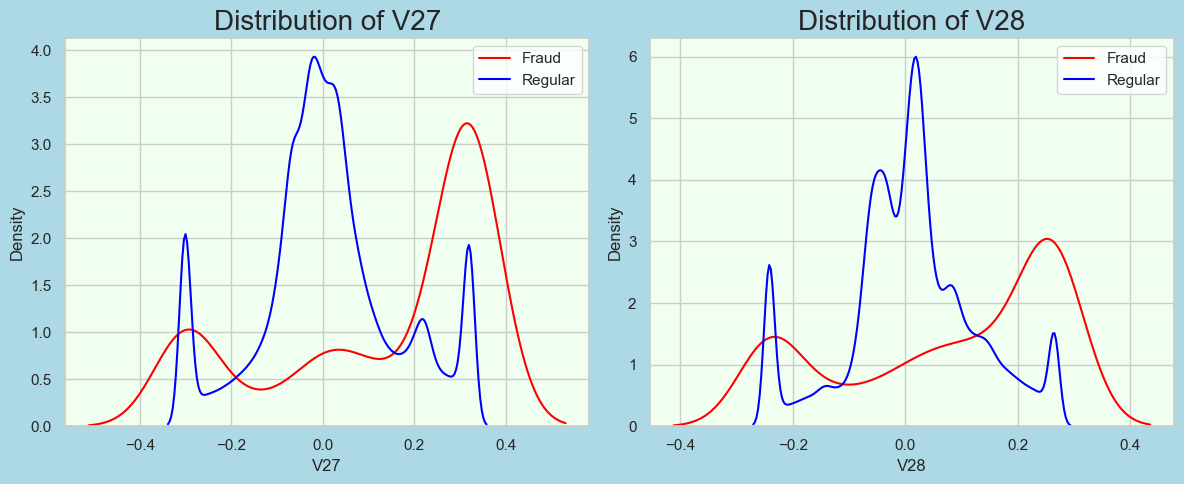

In [128]:

# Loop to create distribution plots for each feature
for i in range(14):  # Assuming 28 features (14 pairs)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    # Plot for the first feature in the pair
    ax1 = sns.kdeplot(data_transformed[data_transformed.Class == 1][features[i * 2]], ax=ax1, color='red', label='Fraud')
    ax1 = sns.kdeplot(data_transformed[data_transformed.Class == 0][features[i * 2]], ax=ax1, color='blue', label='Regular')
    ax1.set_title('Distribution of ' + str(features[i * 2]), fontsize=20)
    ax1.set_facecolor('honeydew')
    ax1.legend()

    # Plot for the second feature in the pair
    ax2 = sns.kdeplot(data_transformed[data_transformed.Class == 1][features[i * 2 + 1]], ax=ax2, color='red', label='Fraud')
    ax2 = sns.kdeplot(data_transformed[data_transformed.Class == 0][features[i * 2 + 1]], ax=ax2, color='blue', label='Regular')
    ax2.set_title('Distribution of ' + str(features[i * 2 + 1]), fontsize=20)
    ax2.set_facecolor('honeydew')
    ax2.legend()

    # Adjust layout and set background color for the figure
    plt.tight_layout()
    fig.set_facecolor('#ADD8E6')

plt.show()

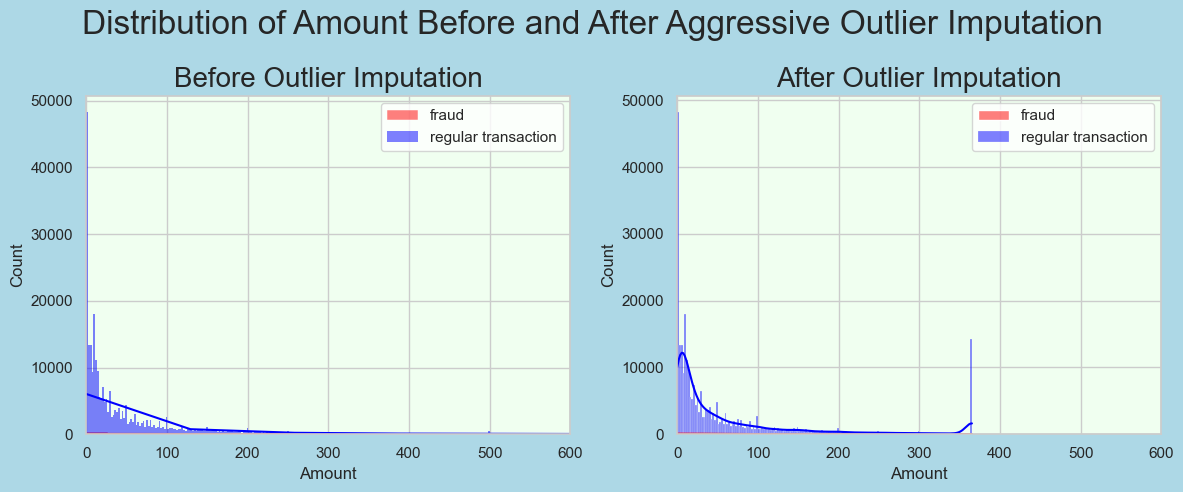

In [129]:
#need to check********************** still havent tramsformed amount I think

# Make a copy of the data for outlier imputation
data_transformed = data.copy()

# Aggressively cap the Amount feature at the 95th percentile
upper_limit = data_transformed['Amount'].quantile(0.95)
data_transformed['Amount'] = np.where(data_transformed['Amount'] > upper_limit, upper_limit, data_transformed['Amount'])

# Plot to show the differences before and after outlier imputation
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# BEFORE Outlier Imputation
sns.histplot(data[data.Class == 1]['Amount'], ax=ax1, color='red', label='fraud', kde=True)
sns.histplot(data[data.Class == 0]['Amount'], ax=ax1, color='blue', label='regular transaction', kde=True)
ax1.set_xlim(0, 600)  # Adjust x-axis limit for clearer comparison
ax1.set_title('Before Outlier Imputation', fontsize=20)
ax1.legend()
ax1.set_facecolor('honeydew')

# AFTER Outlier Imputation
sns.histplot(data_transformed[data_transformed.Class == 1]['Amount'], ax=ax2, color='red', label='fraud', kde=True)
sns.histplot(data_transformed[data_transformed.Class == 0]['Amount'], ax=ax2, color='blue', label='regular transaction', kde=True)
ax2.set_xlim(0, 600)  # Adjust x-axis limit for clearer comparison
ax2.set_title('After Outlier Imputation', fontsize=20)
ax2.legend()
ax2.set_facecolor('honeydew')

# PLOT
fig.suptitle("Distribution of Amount Before and After Aggressive Outlier Imputation", fontsize=24)
plt.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()


In [32]:
#Feature Importance: Trung Nguyen Nov 7: 15:03 --> why you ran a model here since we haven't dealt with the imbalance dataset
#Trung Nguyen Nov 7: 15:03 --> why you ran a model here since we haven't dealt with the imbalance dataset
#X = data_transformed.drop('Class',axis=1)
#y = data_transformed['Class']

In [33]:
# Import required libraries: Trung Nguyen Nov 7: 15:03 --> why you ran a model here since we haven't dealt with the imbalance dataset
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

# Train a Random Forest model to find feature importance
#random_forest = RandomForestClassifier(random_state=1, max_depth=4)
#random_forest.fit(X, y)

# Extract feature importances
#feature_importances = random_forest.feature_importances_

# Create a DataFrame to display feature importance
#feature_importance_df = pd.DataFrame({
 #   'Feature': X.columns,
#    'Importance': feature_importances
#}).sort_values(by='Importance', ascending=False)

# Display the feature importance
#print(feature_importance_df)


In [34]:
#FI=random_forest.feature_importances_
#importances = pd.DataFrame({'feature':X.columns,'importance':np.round(FI,3)})
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances.head(30)

In [35]:
#importances.plot.bar(color='steelblue')

#plt.ylabel('feature importance (%)',fontsize=12)
#plt.title('Feature Importance',fontsize=20)

#plt.tight_layout()
#plt.gcf().patch.set_facecolor('#ADD8E6')
#plt.gca().set_facecolor('honeydew')
#plt.show()

In [130]:
#imbalance: Trung Nguyen: Nov 7:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [134]:
def plot_side_by_side(original, resampled, method_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Original dataset plot
    original.value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title("Original Training Set")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Frequency")
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Not Fraud', 'Fraud'])

    # Resampled dataset plot
    resampled.value_counts().plot(kind='bar', ax=axes[1])
    axes[1].set_title(f"{method_name} Resampled Set")
    axes[1].set_xlabel("Class")
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['Not Fraud', 'Fraud'])

    plt.suptitle(f"Comparison of Original and {method_name} Resampled Distributions")
    plt.show()

# Plot side-by-side comparisons for each resampling method


Original dataset class distribution: Class
0    198277
1       331
Name: count, dtype: int64
Undersampled dataset class distribution: Class
0    331
1    331
Name: count, dtype: int64


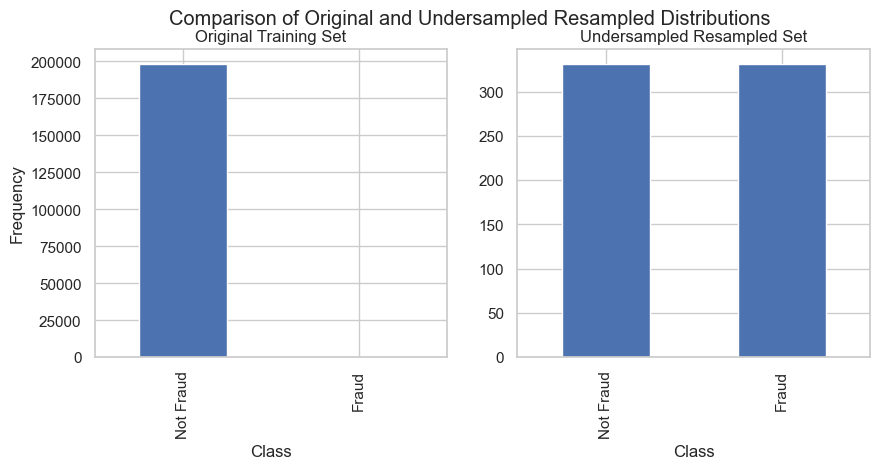

In [136]:
# 1. Undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)
print("Original dataset class distribution:", y_train.value_counts())
print("Undersampled dataset class distribution:", y_train_undersample.value_counts())

plot_side_by_side(y_train, y_train_undersample, "Undersampled")


Original dataset class distribution: Class
0    198277
1       331
Name: count, dtype: int64
Oversampled dataset class distribution: Class
0    198277
1    198277
Name: count, dtype: int64


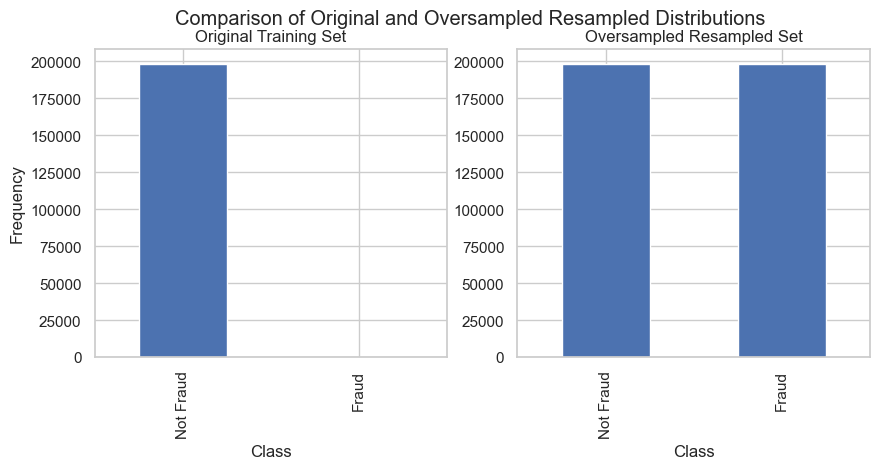

In [138]:
# 2. Oversampling
oversample = RandomOverSampler(random_state=42)
X_train_oversample, y_train_oversample = oversample.fit_resample(X_train, y_train)

print("Original dataset class distribution:", y_train.value_counts())
print("Oversampled dataset class distribution:", y_train_oversample.value_counts())

plot_side_by_side(y_train, y_train_oversample, "Oversampled")

Original dataset class distribution: Class
0    198277
1       331
Name: count, dtype: int64
SMOTE dataset class distribution: Class
0    198277
1    198277
Name: count, dtype: int64


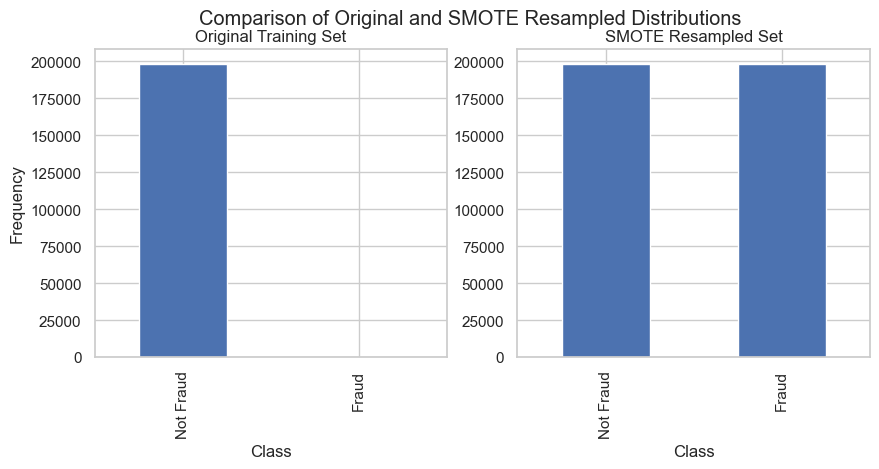

In [140]:
# 3. SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display the class distribution for each resampling method
print("Original dataset class distribution:", y_train.value_counts())
print("SMOTE dataset class distribution:", y_train_smote.value_counts())

plot_side_by_side(y_train, y_train_smote, "SMOTE")

In [142]:
#Rohit
#modelling without tunning
#logistic: remember we run the model through undersampling, oversampling, and smote: 3 regular logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Initialize a dictionary to store results
results = {}

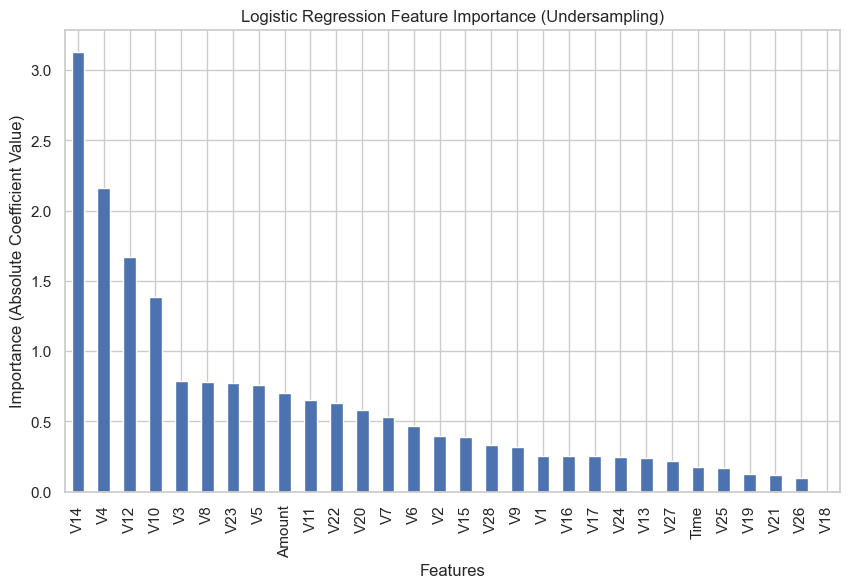

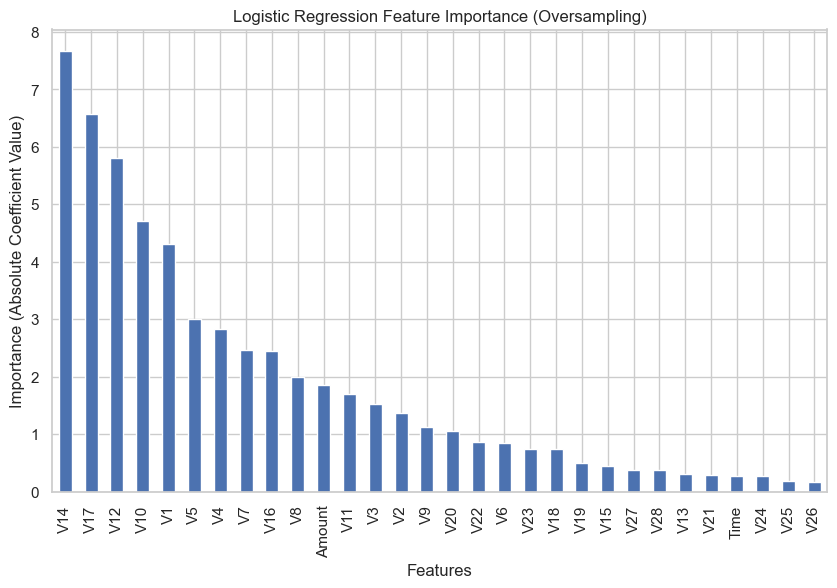

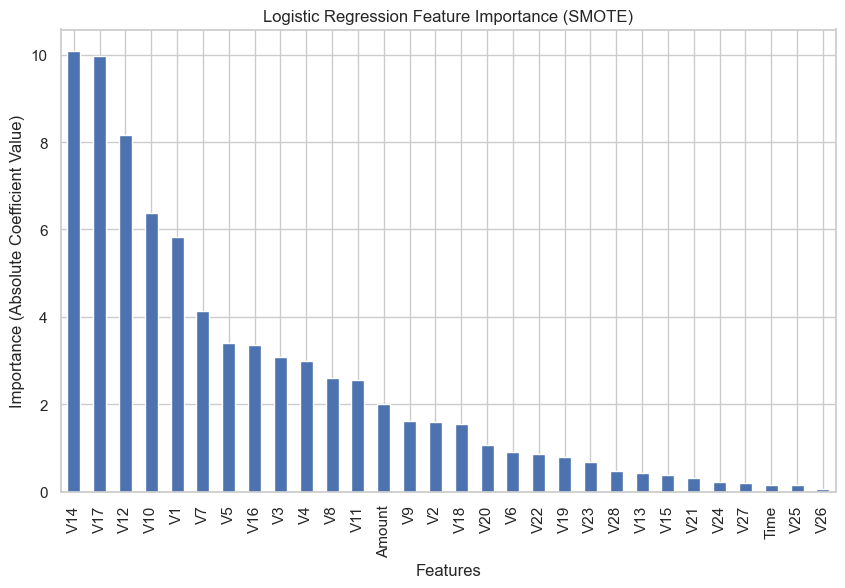


Results for Undersampling:
Confusion Matrix:
 [[82160  2816]
 [   16   126]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     84976
           1       0.04      0.89      0.08       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.53     85118
weighted avg       1.00      0.97      0.98     85118

AUC-ROC Score: 0.9632728942853126

Results for Oversampling:
Confusion Matrix:
 [[82708  2268]
 [   16   126]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

AUC-ROC Score: 0.966455565912894

Results for SMOTE:
Confusion Matrix:
 [[84200   776]
 [   17   125]]
Classi

In [144]:
# Logistic Regression model (without tuning)
logistic_model = LogisticRegression(max_iter=200)

# Helper function to train and evaluate the model
def train_and_evaluate(X_train, y_train, sampling_method):
    # Initialize the scaler and fit it on the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Scale the test set using the same scaler
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the model
    model = logistic_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC-AUC
    
    # Calculate metrics
    metrics = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }
    
    # Store results
    results[sampling_method] = metrics
    
    # Plot feature importance
    feature_importance = np.abs(model.coef_[0])  # Get the absolute values of coefficients
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
    importance_df = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    importance_df.plot(kind='bar')
    plt.title(f"Logistic Regression Feature Importance ({sampling_method})")
    plt.xlabel("Features")
    plt.ylabel("Importance (Absolute Coefficient Value)")
    plt.show()

# Train and evaluate on each dataset
train_and_evaluate(X_train_undersample, y_train_undersample, "Undersampling")
train_and_evaluate(X_train_oversample, y_train_oversample, "Oversampling")
train_and_evaluate(X_train_smote, y_train_smote, "SMOTE")

# Print out the results
for method, metrics in results.items():
    print(f"\nResults for {method}:")
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("Classification Report:\n", metrics["Classification Report"])
    print("AUC-ROC Score:", metrics["AUC-ROC"])



In [146]:
#Random Forest model(without tuning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize a dictionary to store results
results = {}

# Initialize the Random Forest model with default parameters
random_forest_model = RandomForestClassifier(random_state=42)

# Helper function to scale, train, and evaluate the model
def train_and_evaluate(X_train, y_train, sampling_method):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the model on the scaled training data
    model = random_forest_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC-AUC
    
    # Calculate metrics
    metrics = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }
    
    # Store results
    results[sampling_method] = metrics

# Train and evaluate on each dataset
train_and_evaluate(X_train_undersample, y_train_undersample, "Undersampling")
train_and_evaluate(X_train_oversample, y_train_oversample, "Oversampling")
train_and_evaluate(X_train_smote, y_train_smote, "SMOTE")

# Print out the results
for method, metrics in results.items():
    print(f"\nResults for {method}:")
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("Classification Report:\n", metrics["Classification Report"])
    print("AUC-ROC Score:", metrics["AUC-ROC"])



Results for Undersampling:
Confusion Matrix:
 [[82601  2375]
 [   17   125]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

AUC-ROC Score: 0.9720093709972127

Results for Oversampling:
Confusion Matrix:
 [[84972     4]
 [   38   104]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.73      0.83       142

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118

AUC-ROC Score: 0.9487267821767738

Results for SMOTE:
Confusion Matrix:
 [[84963    13]
 [   31   111]]
Class

In [148]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [150]:
#XGBoost model (without tuning)
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize a dictionary to store results
results = {}

# Initialize the XGBoost model with default parameters
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Helper function to scale, train, and evaluate the model
def train_and_evaluate(X_train, y_train, sampling_method):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the XGBoost model on the scaled training data
    model = xgb_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC-AUC
    
    # Calculate metrics
    metrics = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }
    
    # Store results
    results[sampling_method] = metrics

# Train and evaluate on each dataset
train_and_evaluate(X_train_undersample, y_train_undersample, "Undersampling")
train_and_evaluate(X_train_oversample, y_train_oversample, "Oversampling")
train_and_evaluate(X_train_smote, y_train_smote, "SMOTE")

# Print out the results
for method, metrics in results.items():
    print(f"\nResults for {method}:")
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("Classification Report:\n", metrics["Classification Report"])
    print("AUC-ROC Score:", metrics["AUC-ROC"])



Results for Undersampling:
Confusion Matrix:
 [[81640  3336]
 [   17   125]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     84976
           1       0.04      0.88      0.07       142

    accuracy                           0.96     85118
   macro avg       0.52      0.92      0.52     85118
weighted avg       1.00      0.96      0.98     85118

AUC-ROC Score: 0.97279256645124

Results for Oversampling:
Confusion Matrix:
 [[84968     8]
 [   34   108]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.93      0.76      0.84       142

    accuracy                           1.00     85118
   macro avg       0.97      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

AUC-ROC Score: 0.9743687364253304

Results for SMOTE:
Confusion Matrix:
 [[84959    17]
 [   30   112]]
Classif

In [74]:
#Logistic model with tunning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Initialize a dictionary to store results
results = {}

# Define the hyperparameter grid for Logistic Regression
param_grid = [
    {'C': [0.01,0.1,1,10,100], 'solver': ['lbfgs','saga'], 'penalty': ['l2'], 'max_iter': [1000]}
]

# Helper function to scale, tune, train, and evaluate the model
def train_and_evaluate(X_train, y_train, sampling_method):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the Logistic Regression model
    logistic_model = LogisticRegression(random_state=42)
    
    # Set up GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, 
                               scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
    
    # Perform grid search on the training data
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    
    # Make predictions on the scaled test set
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC-AUC
    
    # Calculate metrics
    metrics = {
        "Best Parameters": grid_search.best_params_,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }
    
    # Store results
    results[sampling_method] = metrics

# Run the hyperparameter-tuned Logistic Regression model on each dataset
train_and_evaluate(X_train_undersample, y_train_undersample, "Undersampling")
train_and_evaluate(X_train_oversample, y_train_oversample, "Oversampling")
train_and_evaluate(X_train_smote, y_train_smote, "SMOTE")

# Print out the results
for method, metrics in results.items():
    print(f"\nResults for {method}:")
    print("Best Parameters:", metrics["Best Parameters"])
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("Classification Report:\n", metrics["Classification Report"])
    print("AUC-ROC Score:", metrics["AUC-ROC"])


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

KeyboardInterrupt: 

In [52]:
#Random forest model with tuning

from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Random Forest
param_grid_rf = [
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 
     'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
]

# Helper function to scale, tune, train, and evaluate Random Forest
def train_and_evaluate_rf(X_train, y_train, sampling_method):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    
    # Set up GridSearchCV with 5-fold cross-validation
    grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                                  scoring='roc_auc', cv=2, n_jobs=-1, verbose=1)
    
    # Perform grid search on the training data
    grid_search_rf.fit(X_train_scaled, y_train)
    
    # Get the best model from grid search
    best_model_rf = grid_search_rf.best_estimator_
    
    # Make predictions on the scaled test set
    y_pred_rf = best_model_rf.predict(X_test_scaled)
    y_proba_rf = best_model_rf.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC-AUC
    
    # Calculate metrics
    metrics_rf = {
        "Best Parameters": grid_search_rf.best_params_,
        "Confusion Matrix": confusion_matrix(y_test, y_pred_rf),
        "Classification Report": classification_report(y_test, y_pred_rf),
        "AUC-ROC": roc_auc_score(y_test, y_proba_rf)
    }
    
    # Store results
    results[sampling_method] = metrics_rf

# Run the hyperparameter-tuned Random Forest model on each dataset
train_and_evaluate_rf(X_train_undersample, y_train_undersample, "Undersampling")
train_and_evaluate_rf(X_train_oversample, y_train_oversample, "Oversampling")
train_and_evaluate_rf(X_train_smote, y_train_smote, "SMOTE")

# Print out the results
for method, metrics in results.items():
    print(f"\nResults for {method}:")
    print("Best Parameters:", metrics["Best Parameters"])
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("Classification Report:\n", metrics["Classification Report"])
    print("AUC-ROC Score:", metrics["AUC-ROC"])


Fitting 2 folds for each of 216 candidates, totalling 432 fits
Fitting 2 folds for each of 216 candidates, totalling 432 fits


KeyboardInterrupt: 

In [ ]:
#XGBoost model with tuning
import xgboost as xgb

# Define the hyperparameter grid for XGBoost
param_grid_xgb = [
    {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 
     'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2]}
]

# Helper function to scale, tune, train, and evaluate XGBoost
def train_and_evaluate_xgb(X_train, y_train, sampling_method):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the XGBoost model
    xgb_model = xgb.XGBClassifier(random_state=42)
    
    # Set up GridSearchCV with 5-fold cross-validation
    grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                                   scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
    
    # Perform grid search on the training data
    grid_search_xgb.fit(X_train_scaled, y_train)
    
    # Get the best model from grid search
    best_model_xgb = grid_search_xgb.best_estimator_
    
    # Make predictions on the scaled test set
    y_pred_xgb = best_model_xgb.predict(X_test_scaled)
    y_proba_xgb = best_model_xgb.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC-AUC
    
    # Calculate metrics
    metrics_xgb = {
        "Best Parameters": grid_search_xgb.best_params_,
        "Confusion Matrix": confusion_matrix(y_test, y_pred_xgb),
        "Classification Report": classification_report(y_test, y_pred_xgb),
        "AUC-ROC": roc_auc_score(y_test, y_proba_xgb)
    }
    
    # Store results
    results[sampling_method] = metrics_xgb

# Run the hyperparameter-tuned XGBoost model on each dataset
train_and_evaluate_xgb(X_train_undersample, y_train_undersample, "Undersampling")
train_and_evaluate_xgb(X_train_oversample, y_train_oversample, "Oversampling")
train_and_evaluate_xgb(X_train_smote, y_train_smote, "SMOTE")

# Print out the results
for method, metrics in results.items():
    print(f"\nResults for {method}:")
    print("Best Parameters:", metrics["Best Parameters"])
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("Classification Report:\n", metrics["Classification Report"])
    print("AUC-ROC Score:", metrics["A


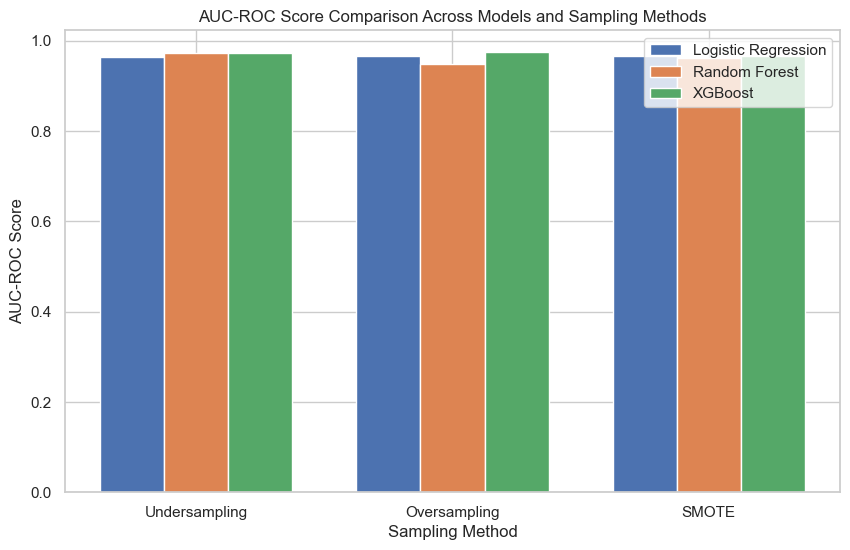

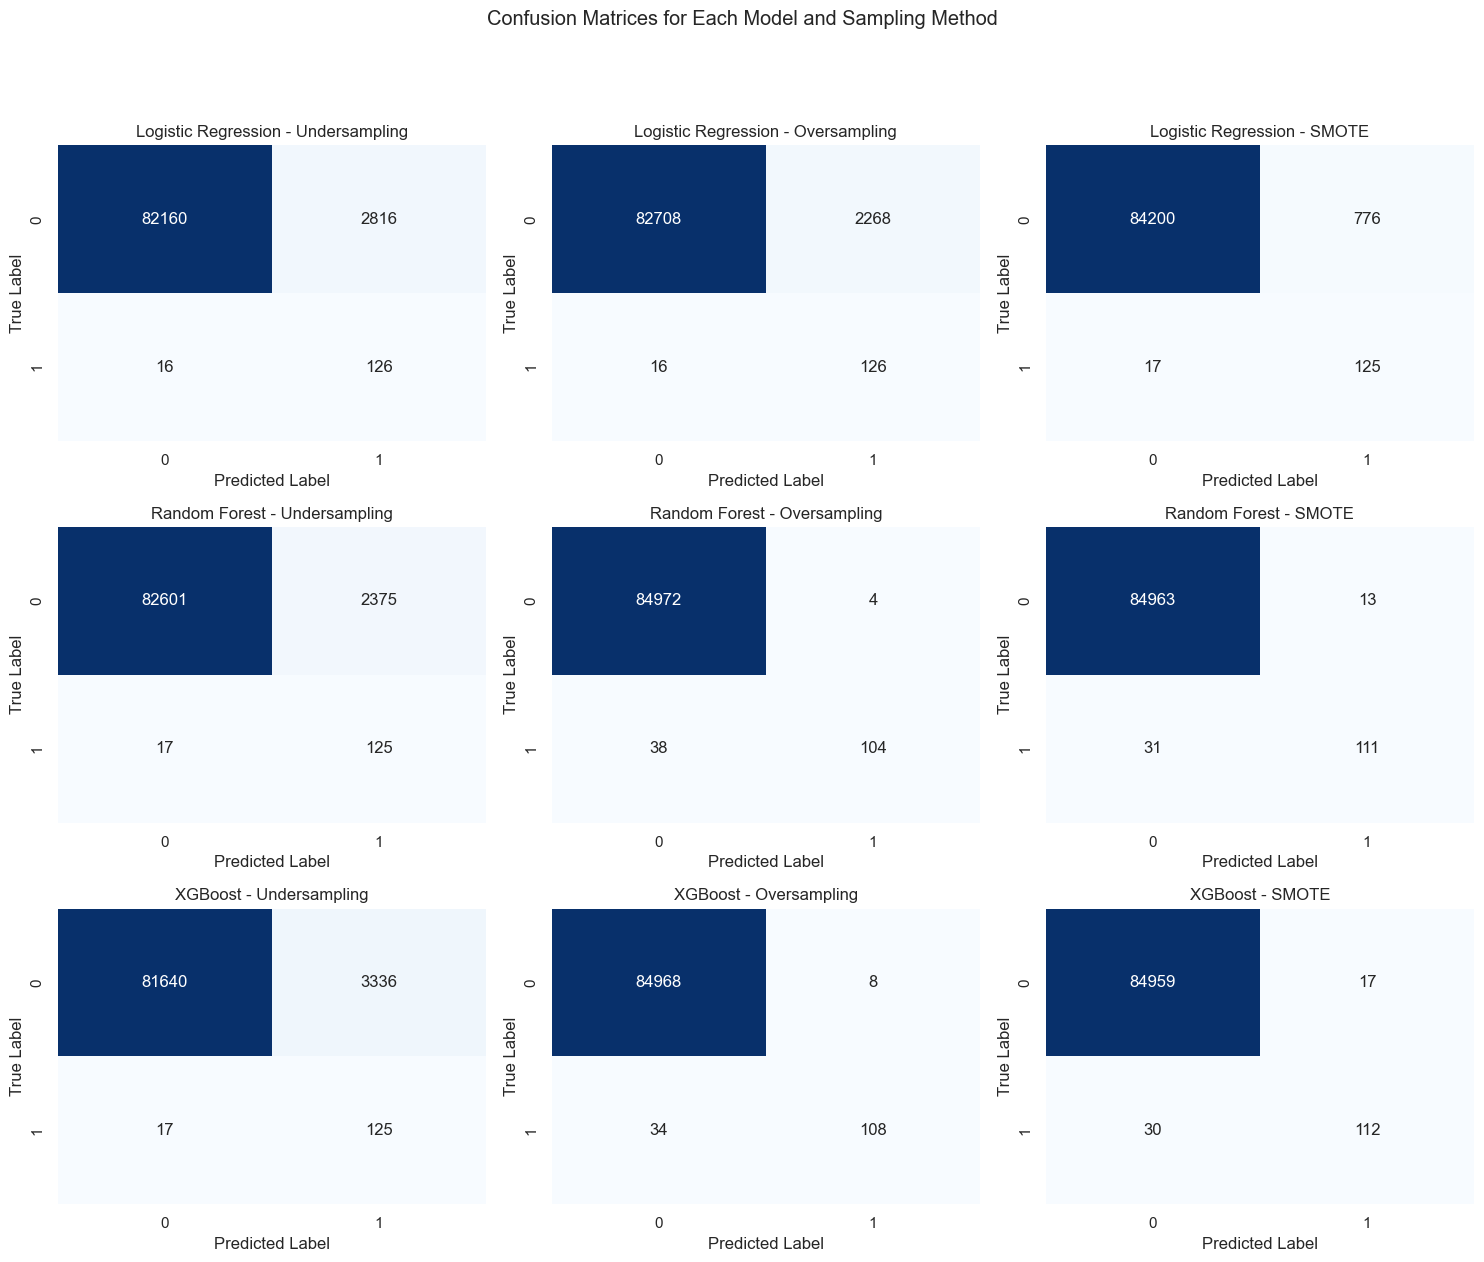

In [152]:
# Evaluating models without tuning : Afnan
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Store model results in a structured dictionary format for easier plotting
all_results = {
    "Logistic Regression": {
        "Undersampling": {
            "Confusion Matrix": [[82160, 2816], [16, 126]],
            "AUC-ROC": 0.9632728942853126
        },
        "Oversampling": {
            "Confusion Matrix": [[82708, 2268], [16, 126]],
            "AUC-ROC": 0.966455565912894
        },
        "SMOTE": {
            "Confusion Matrix": [[84200, 776], [17, 125]],
            "AUC-ROC": 0.9664287149180151
        }
    },
    "Random Forest": {
        "Undersampling": {
            "Confusion Matrix": [[82601, 2375], [17, 125]],
            "AUC-ROC": 0.9720093709972127
        },
        "Oversampling": {
            "Confusion Matrix": [[84972, 4], [38, 104]],
            "AUC-ROC": 0.9487267821767738
        },
        "SMOTE": {
            "Confusion Matrix": [[84963, 13], [31, 111]],
            "AUC-ROC": 0.9615784639109368
        }
    },
    "XGBoost": {
        "Undersampling": {
            "Confusion Matrix": [[81640, 3336], [17, 125]],
            "AUC-ROC": 0.97279256645124
        },
        "Oversampling": {
            "Confusion Matrix": [[84968, 8], [34, 108]],
            "AUC-ROC": 0.9743687364253304
        },
        "SMOTE": {
            "Confusion Matrix": [[84959, 17], [30, 112]],
            "AUC-ROC": 0.9659622203187114
        }
    }
}

# Plotting AUC-ROC Scores for each Model and Sampling Method
sampling_methods = ["Undersampling", "Oversampling", "SMOTE"]
models = list(all_results.keys())
x = np.arange(len(sampling_methods))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  # Bar width

for i, model in enumerate(models):
    auc_scores = [all_results[model][method]["AUC-ROC"] for method in sampling_methods]
    ax.bar(x + i * width, auc_scores, width, label=model)

# Labels and title
ax.set_xlabel("Sampling Method")
ax.set_ylabel("AUC-ROC Score")
ax.set_title("AUC-ROC Score Comparison Across Models and Sampling Methods")
ax.set_xticks(x + width)
ax.set_xticklabels(sampling_methods)
ax.legend()

plt.show()

# Plotting Confusion Matrices for Each Model and Sampling Method
fig, axes = plt.subplots(len(models), len(sampling_methods), figsize=(15, 12))
fig.suptitle("Confusion Matrices for Each Model and Sampling Method", y=1.05)

for i, model in enumerate(models):
    for j, method in enumerate(sampling_methods):
        cm = all_results[model][method]["Confusion Matrix"]
        ax = axes[i, j]
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"{model} - {method}")
        ax.set_xlabel("Predicted Label")
        ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/var/folders/nc/jvf2g8f13ks5xcnf_vn2lrjm0000gn/T/ipykernel_28745/1259727898.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color="navy", linestyle='--')
/var/folders/nc/jvf2g8f13ks5xcnf_vn2lrjm0000gn/T/ipykernel_28745/1259727898.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color="navy", linestyle='--')


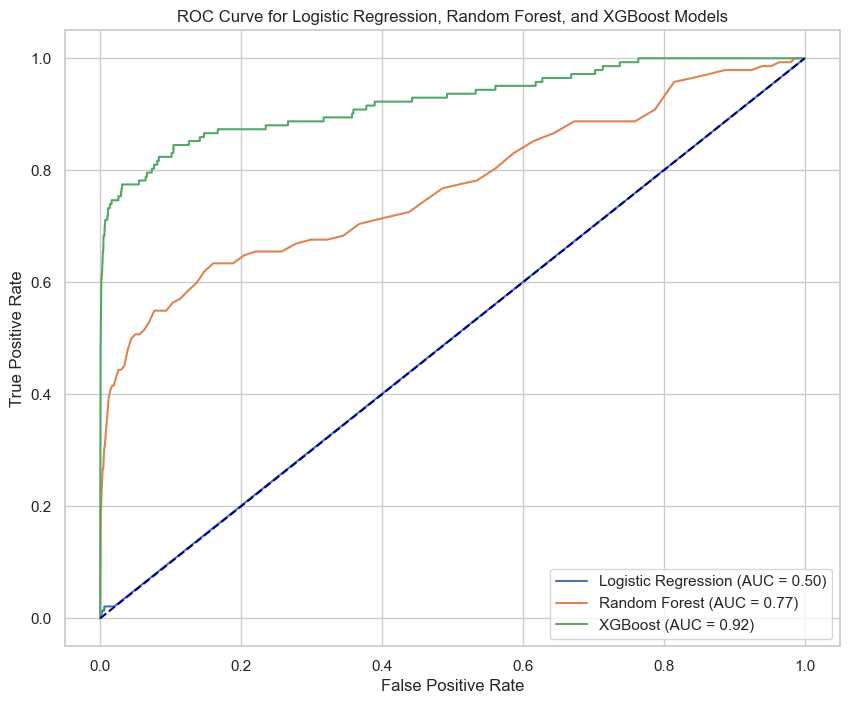

In [154]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming models have been fitted and are named as logistic_model, random_forest_model, xgb_model
# And that X_test, y_test are the testing data

# Dictionary to store models and labels
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgb_model
}

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Get model probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Plot each ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Plot the diagonal line for reference (chance line)
plt.plot([0, 1], [0, 1], 'k--', color="navy", linestyle='--')

# Formatting the plot
plt.title("ROC Curve for Logistic Regression, Random Forest, and XGBoost Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [156]:
from sklearn.metrics import accuracy_score

# Dictionary with model names and instances
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgb_model
}

# Calculate and print accuracy for each model
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy of {model_name}: {accuracy:.2f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy of Logistic Regression: 0.99
Accuracy of Random Forest: 0.90
Accuracy of XGBoost: 0.59
